Purpose: This script takes a formatted table in pickle file format as input. The data is checked for stationarity and seasonality. 6 times series forecast models are run on each sector and visualised. The accuracy of each forecast model is checked using MSE.

# WIP

- Alan's WIP:
  - change output dimensions for seasonal decompose (more columns)
  - rolling average prediction - use -1 history value
  - ACF/PACF - fill 0 values with mean 

# Importing the library

In [3]:

import numpy as np
import pandas as pd 


In [2]:
import os
os.getcwd()
os.chdir(r'\\ausydfsr11\_Tax\Tax Technology & Innovation\Digital Solutions\Deal Advisory\Horizon Scanning Global Project\Phase 2 Deliverables\2.3 Dev\8. Deal Index\3. Code\WIP\Data Inputs')

In [3]:
# import Deal value data
data = pd.read_pickle('Deal_value_SI_sector.pkl')
data

Communications Services  Consumer Discretionary  \
Announced Quarter                                                    
2010Q1                           23.265000              215.547714   
2010Q2                           74.393300              143.252100   
2010Q3                          117.372000              138.187000   
2010Q4                           33.827560               68.356040   
2011Q1                          856.069833              314.944275   
2011Q2                          347.201300              305.514554   
2011Q3                           22.672680             1773.515371   
2011Q4                           73.822111              286.722923   
2012Q1                           64.320171              369.159450   
2012Q2                           69.542611              121.505089   
2012Q3                          297.484310              126.351400   
2012Q4                           29.159000              133.264111   
2013Q1                          181.930000               36.764100   
2013Q2                           67.019567               38.923077   
2013Q3                           49.391450               51.397443   
2013Q4                           76.937500               89.313073   
2014Q1                          106.052500               72.210358   
2014Q2                          103.928750              180.057153   
2014Q3                           90.245375               62.893478   
2014Q4                           86.233509              112.408595   
2015Q1                          353.928460               41.095770   
2015Q2                          388.827067              173.815825   
2015Q3                          411.813038               59.000840   
2015Q4                           87.380455               44.331176   
2016Q1                           43.635100               82.661250   
2016Q2                          132.941667              109.346538   
2016Q3                           52.981208               97.356963   
2016Q4                          132.426370              366.365738   
2017Q1                           24.375000               64.997053   
2017Q2                           58.102960              144.106414   
2017Q3                          280.953556               29.933385   
2017Q4                           19.087500              102.073629   
2018Q1                           19.826240              145.173658   
2018Q2                          338.452967               97.873143   
2018Q3                         1853.192167               30.800950   
2018Q4                          450.887737             1196.725800   
2019Q1                           40.859167               99.070010   
2019Q2                          155.227275              231.402769   
2019Q3                           80.342025             1001.894941   
2019Q4                           66.280542              121.468597   
2020Q1                          138.497900               31.497653   
2020Q2                          243.155850              261.177843   
2020Q3                          134.278129              183.473089   
2020Q4                          108.810070              467.296850   
2021Q1                          639.934322              599.761700   
2021Q2                          378.488800              824.584624   
2021Q3                           58.854064               72.409835   
2021Q4                          533.380967              153.634500   
2022Q1                            0.000000                0.000000   

                   Consumer Staples        Energy   Financials  Health Care  \
Announced Quarter                                                             
2010Q1                    32.952500    594.683571  1803.301400    17.586645   
2010Q2                   125.399367     68.508817   182.516667    47.965192   
2010Q3                  1769.715333    493.954925   127.381429   475.834375   
2010Q4                   143.702317    529.697500  24

In [4]:
# remove data of 2022 Q1  (THIS IS deleting a row by index value)
History_value=data.drop('2022Q1')
History_value.shape


(48, 11)

#  Time Series check

check stationarity


In [5]:
# stationarity functions

def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print(pd.DataFrame(dataset).columns)
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
     if dftest[0] < dftest[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
     else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")    


In [6]:
# -- able to use Mean Reversion 
for column in History_value:
    print(ad_test(History_value[column].fillna(0)))


Index(['Communications Services'], dtype='object')
1. ADF :  -5.4470605428962475
2. P-Value :  2.6957830341683556e-06
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 47
5. Critical Values :
	 1% :  -3.5778480370438146
	 5% :  -2.925338105429433
	 10% :  -2.6007735310095064
Reject Ho - Time Series is Stationary
None
Index(['Consumer Discretionary'], dtype='object')
1. ADF :  -3.106063739622511
2. P-Value :  0.02610768693590439
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 45
5. Critical Values :
	 1% :  -3.584828853223594
	 5% :  -2.9282991495198907
	 10% :  -2.6023438271604937
Reject Ho - Time Series is Stationary
None
Index(['Consumer Staples'], dtype='object')
1. ADF :  -6.824288935999218
2. P-Value :  1.965835843538663e-09
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 47
5. Critical Values :
	 1% :  -3.5778480370438146
	 5% :  -2.925338105429433
	 10% :  -2.6007735310095064
Reject Ho - Time Series is Stationary
None
Ind

In [7]:
#The data that i am looking at is "Communication Services"
industry='Consumer Discretionary'

<AxesSubplot:xlabel='Announced Quarter'>

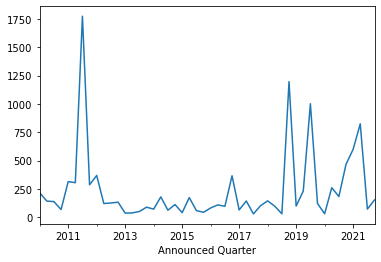

In [8]:
## looks like only industrial has non-stationary pattern. now plot it to check 
History_value[industry].plot()

# All sector test for seasonality

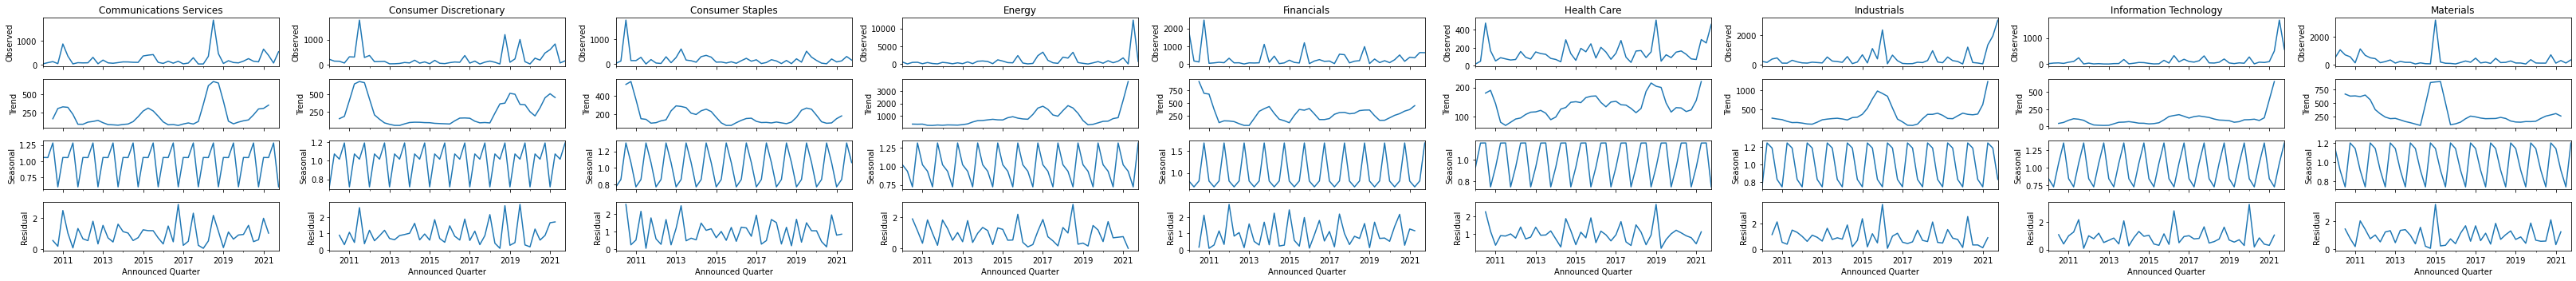

In [9]:
# plt format for seasonal_decompose function
def plotseasonal(res, axes):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

# create plt figure
fig, axes = plt.subplots(ncols=9, nrows=4, sharex=True, figsize=(45,5))

# graphs to show seasonality
# Real Estate and Utilies column not included due to 'zero value' error
i = 0
History_value.index = pd.PeriodIndex(History_value.index, freq='Q').to_timestamp()

for industry in History_value.drop(columns=['Real Estate', 'Utilities']).columns:
    industry_data = History_value[industry].fillna(History_value[industry].mean())
    decomposition = seasonal_decompose(industry_data, model='multiplicable',period=4)
    plotseasonal(decomposition, axes[:,i])
    axes[0,i].set_title(f'{industry}')
    i+=1

plt.tight_layout()
plt.show()

# Time range partitioned into test and train date ranges

In [10]:
# set up the training and testing data
all_industry_data = History_value.fillna(0)  # NA values set to 0

# change quarter date to datetime
all_industry_data.index = pd.PeriodIndex(all_industry_data.index, freq='Q').to_timestamp()

y_to_train = all_industry_data[:'2017-10-01'] # dataset to train
y_to_test_precovid = all_industry_data['2018-01-01':'2019-10-01'] # last X months for test 
y_to_test_covid=all_industry_data['2020-01-01':] 

predict_date_range= all_industry_data['2018-01-01':]
predict_date_range_MA=all_industry_data['2017-04-01':]

y_to_train

Communications Services  Consumer Discretionary  \
Announced Quarter                                                    
2010-01-01                       23.265000              215.547714   
2010-04-01                       74.393300              143.252100   
2010-07-01                      117.372000              138.187000   
2010-10-01                       33.827560               68.356040   
2011-01-01                      856.069833              314.944275   
2011-04-01                      347.201300              305.514554   
2011-07-01                       22.672680             1773.515371   
2011-10-01                       73.822111              286.722923   
2012-01-01                       64.320171              369.159450   
2012-04-01                       69.542611              121.505089   
2012-07-01                      297.484310              126.351400   
2012-10-01                       29.159000              133.264111   
2013-01-01                      181.930000               36.764100   
2013-04-01                       67.019567               38.923077   
2013-07-01                       49.391450               51.397443   
2013-10-01                       76.937500               89.313073   
2014-01-01                      106.052500               72.210358   
2014-04-01                      103.928750              180.057153   
2014-07-01                       90.245375               62.893478   
2014-10-01                       86.233509              112.408595   
2015-01-01                      353.928460               41.095770   
2015-04-01                      388.827067              173.815825   
2015-07-01                      411.813038               59.000840   
2015-10-01                       87.380455               44.331176   
2016-01-01                       43.635100               82.661250   
2016-04-01                      132.941667              109.346538   
2016-07-01                       52.981208               97.356963   
2016-10-01                      132.426370              366.365738   
2017-01-01                       24.375000               64.997053   
2017-04-01                       58.102960              144.106414   
2017-07-01                      280.953556               29.933385   
2017-10-01                       19.087500              102.073629   

                   Consumer Staples       Energy   Financials  Health Care  \
Announced Quarter                                                            
2010-01-01                32.952500   594.683571  1803.301400    17.586645   
2010-04-01               125.399367    68.508817   182.516667    47.965192   
2010-07-01              1769.715333   493.954925   127.381429   475.834375   
2010-10-01               143.702317   529.697500  2463.877978   165.039338   
2011-01-01               143.219400   125.963333    53.633333    51.886946   
2011-04-01               273.615750   453.250900    76.748714    87.992900   
2011-07-01                 6.700000   181.489333   110.137400    74.638831   
2011-10-01               183.878550    80.102100    85.917500    62.203333   
2012-01-01                45.804000   500.816167     0.000000    68.163625   
2012-04-01                28.333333   353.818067    77.937350   157.596014   
2012-07-01               296.008000   110.898687    82.148080    93.044217   
2012-10-01                58.857143   376.483500    14.706667    72.718769   
2013-01-01               266.295000   142.875133    78.975333   152.514785   
2013-04-01               608.063367   630.262627    69.934125   134.410000   
2013-07-01               165.012333   149.643214    82.173286   125.727427   
2013-10-01               137.636078   817.622029  1110.297400    80.289700   
2014-01-01                78.817500   893.010331   110.105600    68.415844   
2014-04-01               301.589540   746.110517   453.767856    42.424892   
2014-07-01               353.272500   138.029667    35.432300   288.821413   


In [11]:
#check the size of train and test data set x2
print(y_to_train.shape)
print(y_to_test_precovid.shape)
print(y_to_test_covid.shape)
print(predict_date_range.shape)

(32, 11)
(8, 11)
(8, 11)
(16, 11)


In [12]:
y_to_train[f'{industry}']


Announced Quarter
2010-01-01     500.625889
2010-04-01    1073.546989
2010-07-01     709.224731
2010-10-01     570.102700
2011-01-01     133.971200
2011-04-01    1138.341329
2011-07-01     675.577516
2011-10-01     497.259783
2012-01-01     437.162942
2012-04-01     143.874592
2012-07-01     222.597424
2012-10-01     341.217456
2013-01-01     117.189058
2013-04-01     236.574890
2013-07-01     169.163808
2013-10-01     168.815518
2014-01-01      51.042257
2014-04-01     132.167700
2014-07-01      73.769400
2014-10-01      64.244789
2015-01-01    3213.998340
2015-04-01     190.604608
2015-07-01     103.621262
2015-10-01      92.747300
2016-01-01      54.332862
2016-04-01     158.155300
2016-07-01     265.605936
2016-10-01     177.591412
2017-01-01     470.117712
2017-04-01     126.276093
2017-07-01     181.886627
2017-10-01      94.079321
Freq: QS-OCT, Name: Materials, dtype: float64

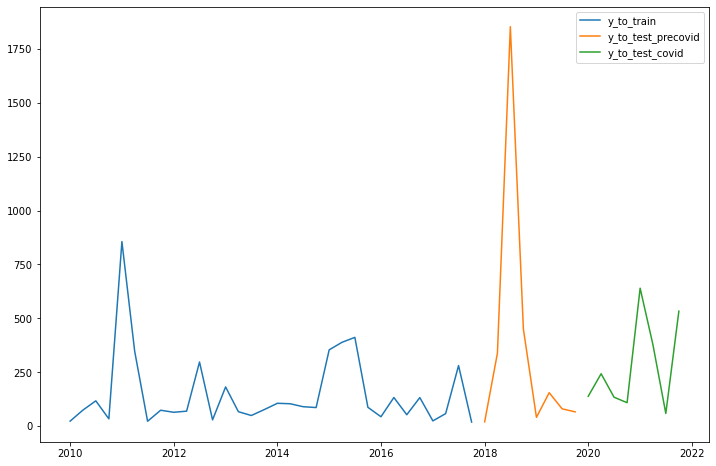

In [13]:
# Visualize split
industry = 'Communications Services'

fig,ax= plt.subplots(figsize=(12,8))
plt.plot(y_to_train[f'{industry}'], label='y_to_train')
plt.plot(y_to_test_precovid[f'{industry}'], label='y_to_test_precovid' )
plt.plot(y_to_test_covid[f'{industry}'], label='y_to_test_covid')
ax.legend(bbox_to_anchor=[1,1])


# Method 1 - Moving Average

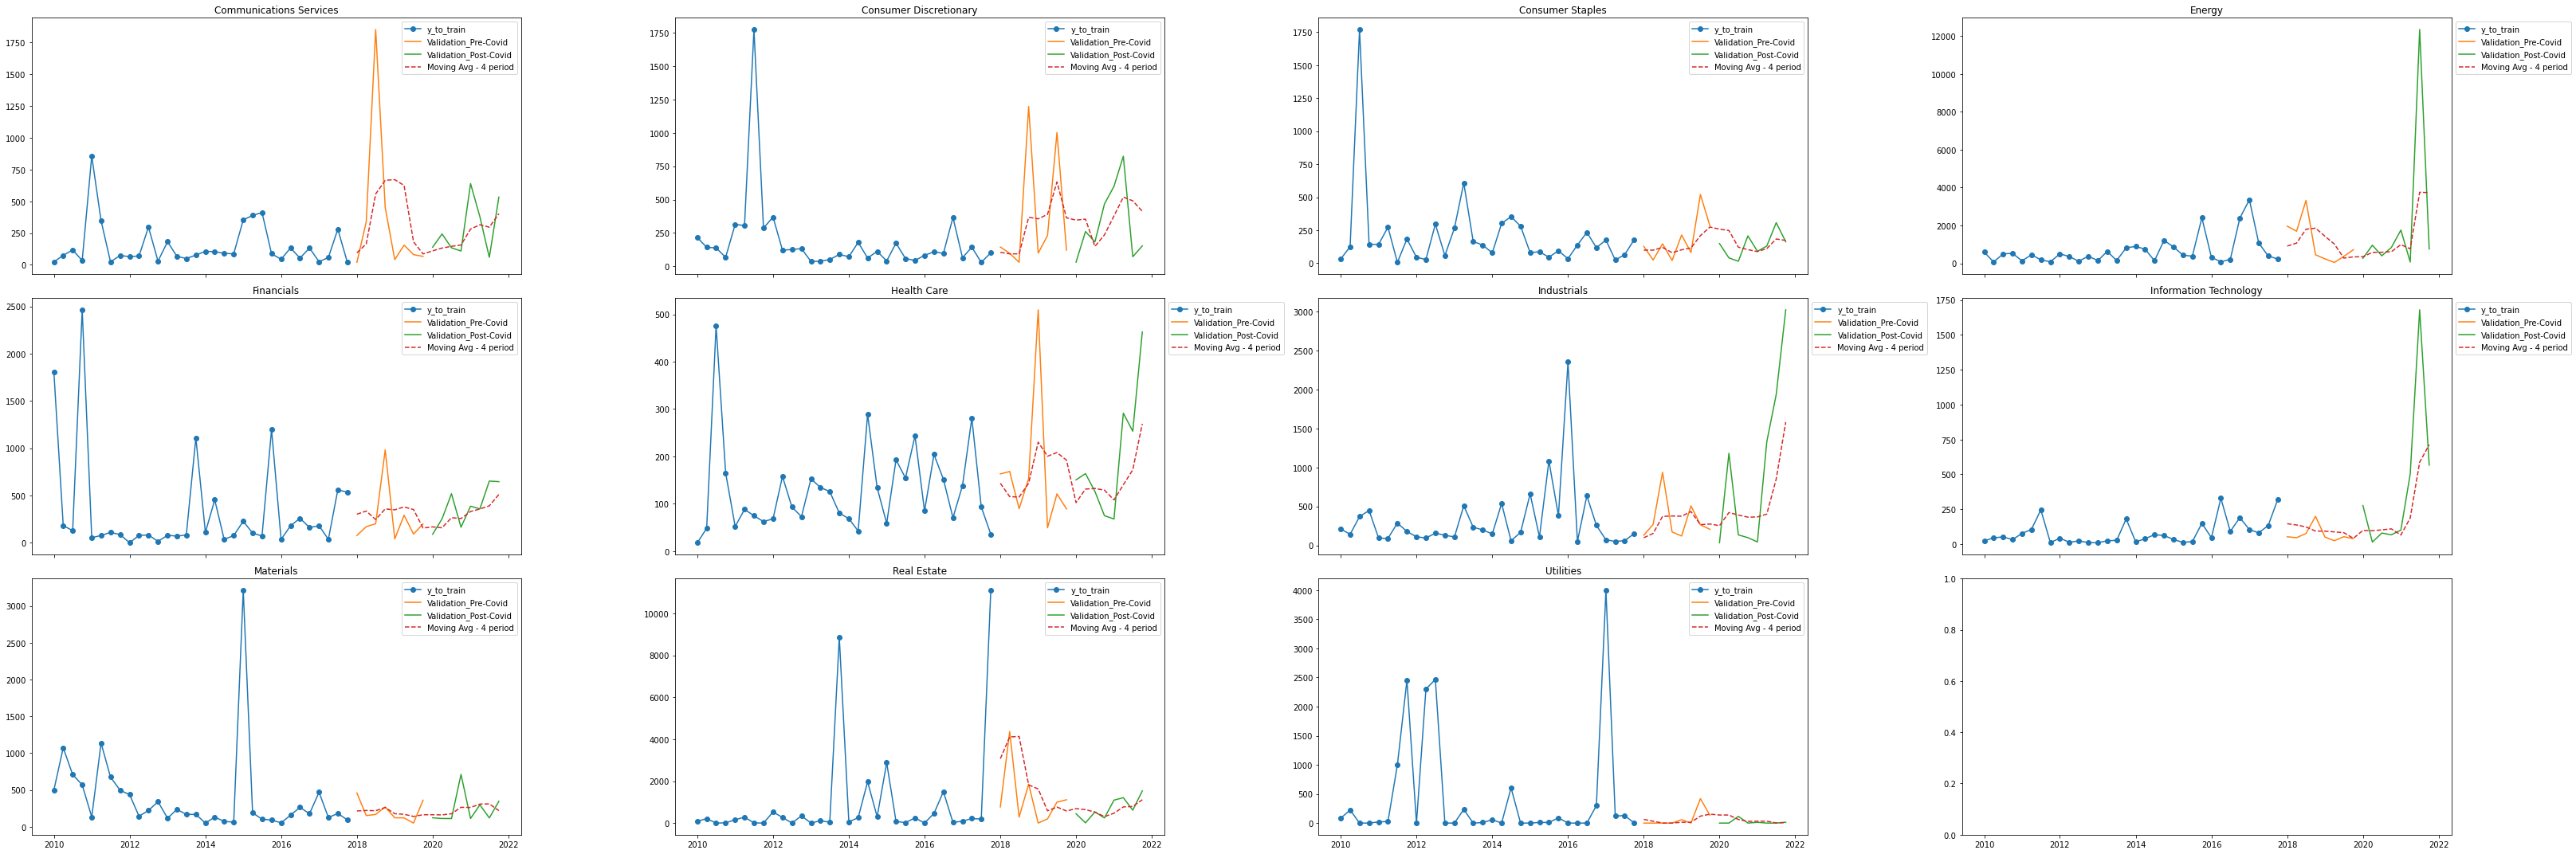

Communications Services  Consumer Discretionary  \
Announced Quarter                                                    
2017-04-01                             NaN                     NaN   
2017-07-01                             NaN                     NaN   
2017-10-01                             NaN                     NaN   
2018-01-01                       94.492564              105.321771   
2018-04-01                      164.580066               93.763454   
2018-07-01                      557.639718               93.980345   
2018-10-01                      665.589778              367.643388   
2019-01-01                      670.848009              356.117476   
2019-04-01                      625.041586              389.499882   
2019-07-01                      181.829051              632.273380   
2019-10-01                       85.677252              363.459079   
2020-01-01                      110.086935              346.565990   
2020-04-01                      132.069079              354.009759   
2020-07-01                      145.553105              149.404295   
2020-10-01                      156.185487              235.861359   
2021-01-01                      281.544593              377.927370   
2021-04-01                      315.377830              518.779066   
2021-07-01                      296.521814              491.013252   
2021-10-01                      402.664538              412.597665   

                   Consumer Staples       Energy  Financials  Health Care  \
Announced Quarter                                                           
2017-04-01                      NaN          NaN         NaN          NaN   
2017-07-01                      NaN          NaN         NaN          NaN   
2017-10-01                      NaN          NaN         NaN          NaN   
2018-01-01                99.539915   913.186606  301.863453   143.150730   
2018-04-01                99.501058  1067.527060  335.345351   114.952542   
2018-07-01               119.902909  1801.036654  245.536725   113.992927   
2018-10-01                80.410702  1857.105869  357.671059   143.361455   
2019-01-01               101.955471  1424.480144  348.432720   229.990010   
2019-04-01               116.127688  1013.068157  378.673670   200.243855   
2019-07-01               209.432842   273.853533  351.427611   208.077831   
2019-10-01               274.547784   340.769095  155.402903   192.041507   
2020-01-01               258.207083   349.055116  167.783057   102.278277   
2020-04-01               248.083323   576.401831  158.113818   130.896340   
2020-07-01               121.682152   584.109361  264.618646   132.198731   
2020-10-01               103.155589   612.924289  256.110961   128.663145   
2021-01-01                88.487979   985.873280  330.380849   107.997850   
2021-04-01               110.897909   763.881214  356.901761   139.911177   
2021-07-01               183.978907  3753.190089  390.467669   171.672852   
2021-10-01               172.770128  3732.907651  510.924344   268.653960   

                   Industrials  Information Technology   Materials  \
Announced Quarter                                                    
2017-04-01                 NaN                     NaN         NaN   
2017-07-01                 NaN                     NaN         NaN   
2017-10-01                 NaN                     NaN         NaN   
2018-01-01           97.553214              146.328332  215.530046   
2018-04-01          152.160804              137.481314  222.230854   
2018-07-01          371.632722              123.379537  218.767722   
2018-10-01          376.566682               93.734327  262.767337   
2019-01-01          373.995020               93.055837  178.460702   
2019-04-01          433.613250               87.715379  170.467766   
2019-07-01          265.172438               81.936431  141.203738   
2019-10-01          273.806902               41.640812  164.134349   
2020-01-01          

In [14]:
#industry_list = ['Communications Services']  ## WIP

#inputs - list of industries to visualise, length of mean
industry_list = History_value.columns
mean_length = 4

moving_avg_df = pd.DataFrame(index=predict_date_range_MA.index) #stores moving avg for industries

fig, axes = plt.subplots(ncols=min(len(industry_list), 4), nrows=len(industry_list)//4+1, sharex=True, figsize=(45,15))
kws = dict(marker='o')
i = 0

for industry in industry_list:
    moving_avg = predict_date_range_MA[industry].rolling(mean_length).mean()
    moving_avg_df[industry] = moving_avg

    axes[i//4, i%4].plot(y_to_train[industry], label='y_to_train', **kws)
    axes[i//4, i%4].plot(y_to_test_precovid[industry], label='Validation_Pre-Covid', )
    axes[i//4, i%4].plot(y_to_test_covid[industry], label='Validation_Post-Covid')
    axes[i//4, i%4].plot(moving_avg, label=f'Moving Avg - {mean_length} period',linestyle='--')
    axes[i//4, i%4].legend(bbox_to_anchor=[1,1])
    axes[i//4, i%4].set_title(f'{industry}')
    i += 1


plt.tight_layout()
plt.show()
moving_avg_df

In [15]:
# let met check, put the 2 columns side by side - real data vs forecast
industry = 'Communications Services'
print(pd.concat([predict_date_range[industry],moving_avg_df[industry]['2018-01-01':]],axis=1))

                   Communications Services  Communications Services
Announced Quarter                                                  
2018-01-01                       19.826240                94.492564
2018-04-01                      338.452967               164.580066
2018-07-01                     1853.192167               557.639718
2018-10-01                      450.887737               665.589778
2019-01-01                       40.859167               670.848009
2019-04-01                      155.227275               625.041586
2019-07-01                       80.342025               181.829051
2019-10-01                       66.280542                85.677252
2020-01-01                      138.497900               110.086935
2020-04-01                      243.155850               132.069079
2020-07-01                      134.278129               145.553105
2020-10-01                      108.810070               156.185487
2021-01-01                      639.934322      

In [16]:
# Root MSE
industry_list = History_value.columns
RMSE_df = pd.DataFrame(index=['RMSE']) #stores Root MSE for industries

for industry in industry_list:
    rmse = sqrt(mean_squared_error(predict_date_range[industry],moving_avg_df[industry]['2018-01-01':]))
    RMSE_df[industry] = rmse

RMSE_df


Communications Services  Consumer Discretionary  Consumer Staples  \
RMSE               403.900141              308.914336        115.737019   

           Energy  Financials  Health Care  Industrials  \
RMSE  2403.707251  226.341548   111.301367   582.746213   

      Information Technology   Materials  Real Estate  Utilities  
RMSE              295.076279  158.671352  1239.427331  93.901935

# Testing ACF and PACF 

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  war

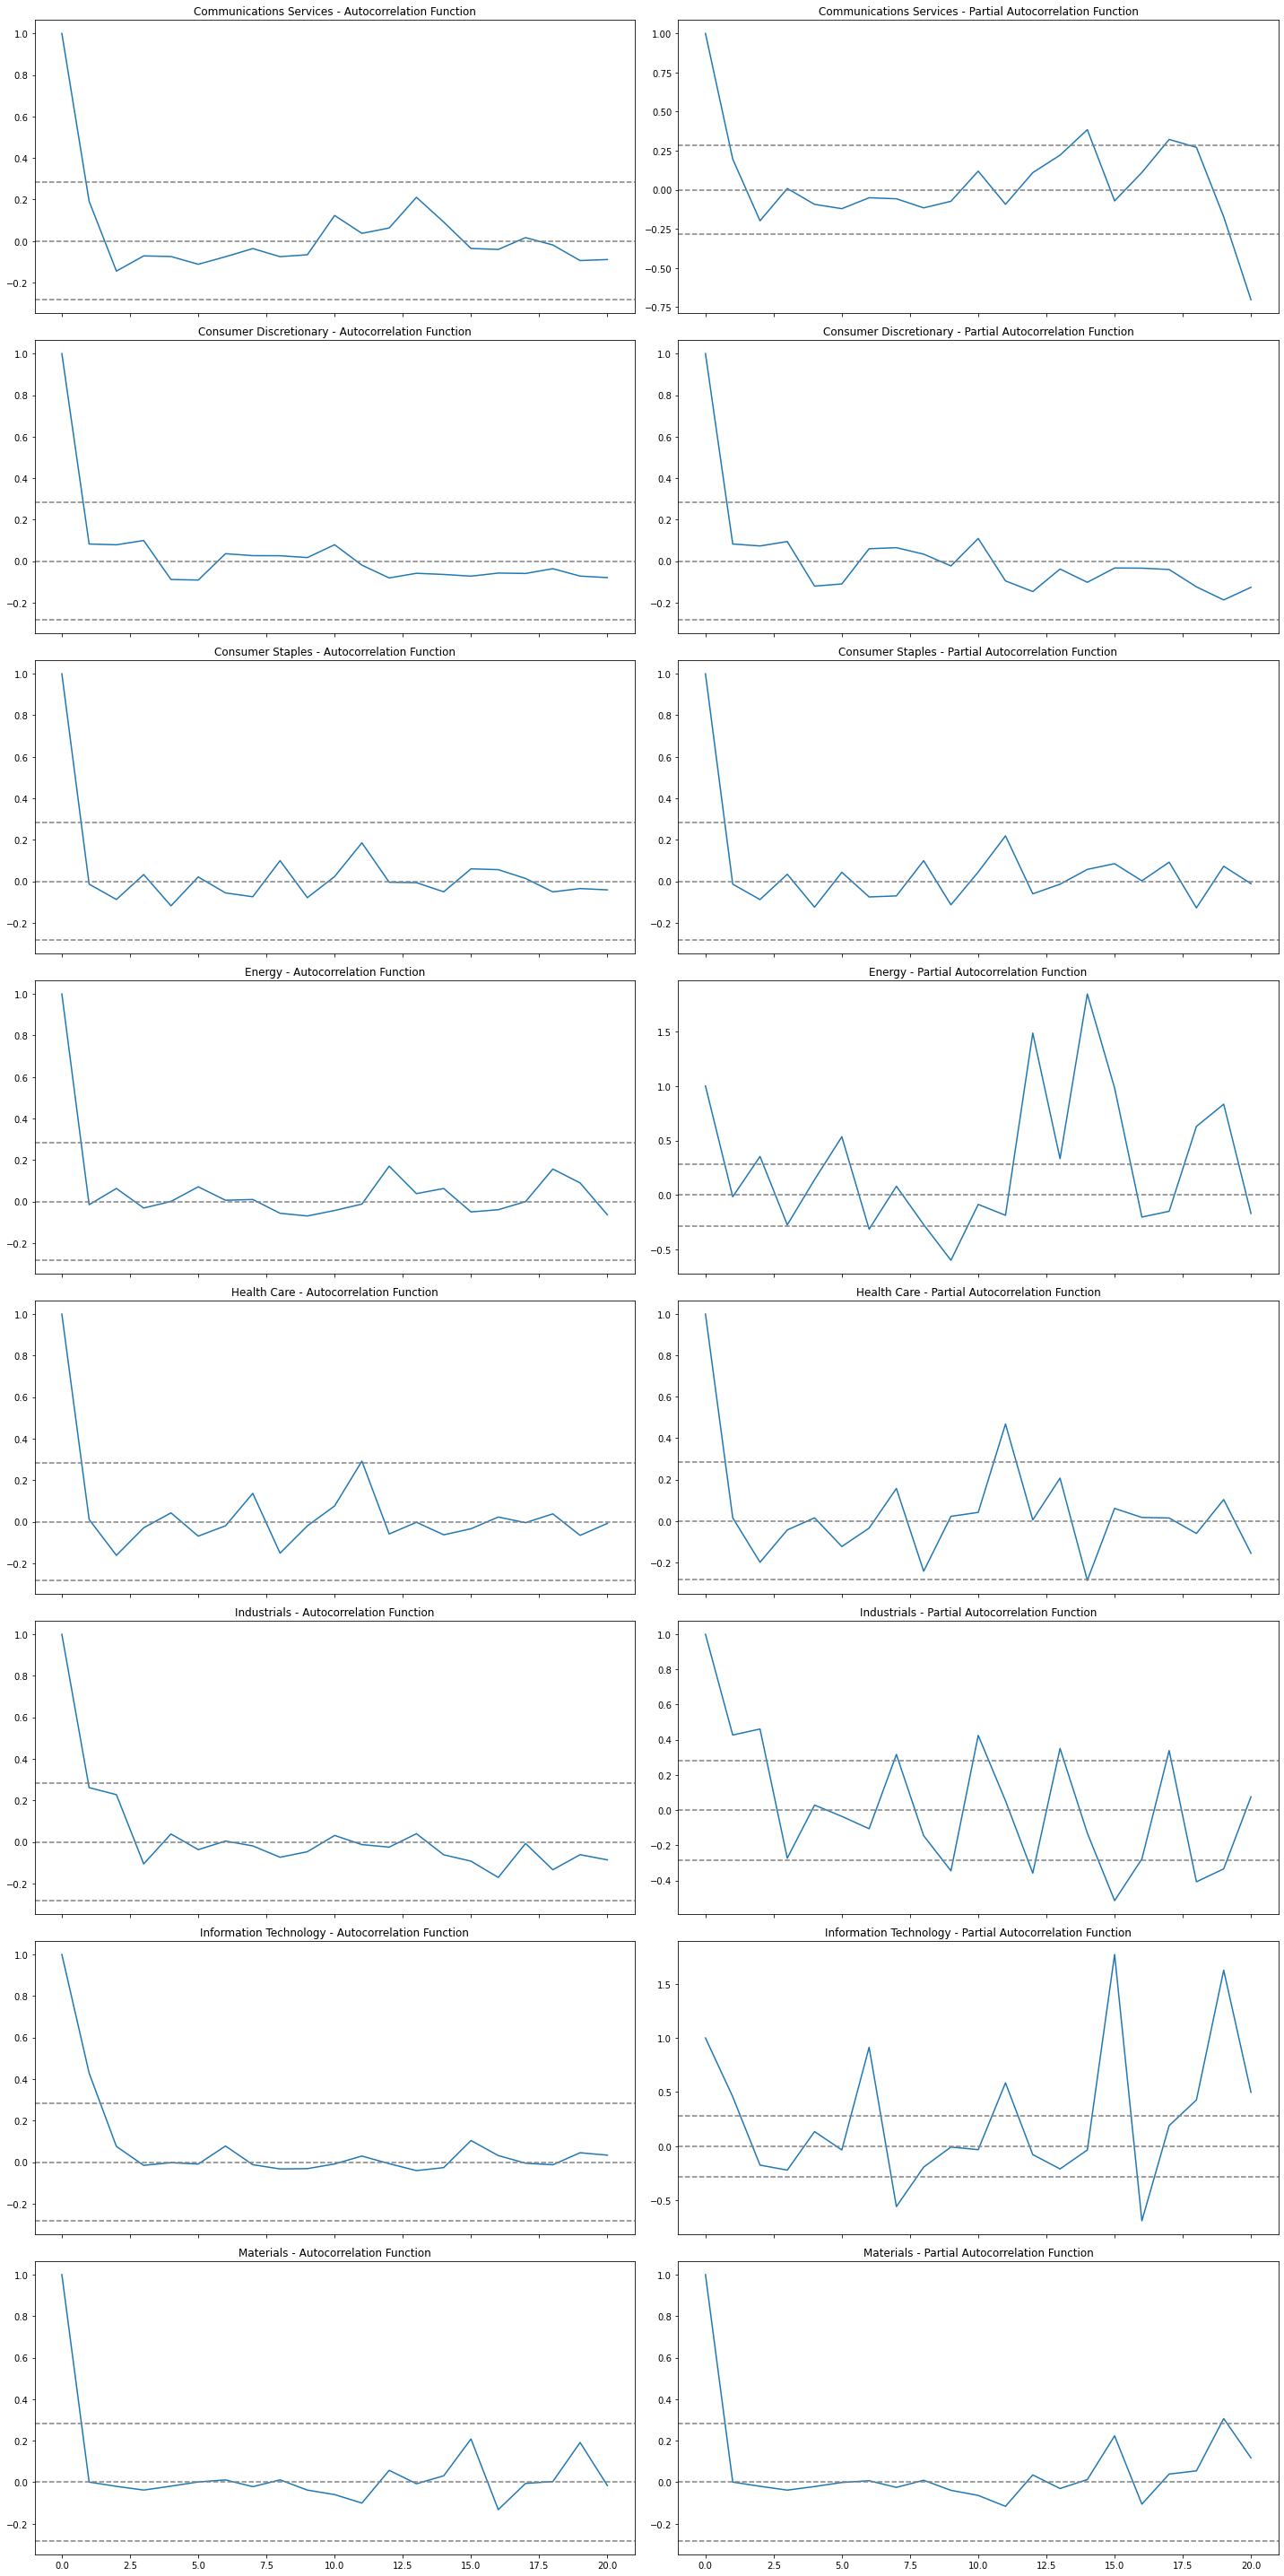

In [17]:
# LOOKING at ACF (Autocorrelation function) PACF to determine P Q D
# plot ACF and PACF
# Sectors ['Financials', 'Real Estate', 'Utilities'] not included due to 'zero value' error
industry_list = History_value.columns.drop(['Financials', 'Real Estate', 'Utilities'])

fig, axes = plt.subplots(nrows=len(industry_list), ncols=2, sharex=True, figsize=(20,len(industry_list)*5))
row_count = len(History_value[industry])
i = 0

for industry in industry_list:
    #Plot ACF: 
    lag_acf = acf(History_value[industry], nlags=20)

    axes[i,0].plot(lag_acf)
    axes[i,0].axhline(y=0,linestyle='--',color='gray')
    axes[i,0].axhline(y=-1.96/np.sqrt(row_count),linestyle='--',color='gray')
    axes[i,0].axhline(y=1.96/np.sqrt(row_count),linestyle='--',color='gray')
    axes[i,0].set_title(f'{industry} - Autocorrelation Function')

    # #Plot PACF:
    lag_pacf = pacf(History_value[industry], nlags=20, method='ols')
    axes[i,1].plot(lag_pacf)
    axes[i,1].axhline(y=0,linestyle='--',color='gray')
    axes[i,1].axhline(y=-1.96/np.sqrt(row_count),linestyle='--',color='gray')
    axes[i,1].axhline(y=1.96/np.sqrt(row_count),linestyle='--',color='gray')
    axes[i,1].set_title(f'{industry} - Partial Autocorrelation Function')

    i += 1

plt.tight_layout()
plt.show()

# Method 2 -Autoregression model

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


                               AutoReg Model Results                               
Dep. Variable:     Communications Services   No. Observations:                   32
Model:                          AutoReg(4)   Log Likelihood                -183.155
Method:                    Conditional MLE   S.D. of innovations            167.722
Date:                     Thu, 12 May 2022   AIC                             10.673
Time:                             15:36:01   BIC                             10.959
Sample:                         01-01-2011   HQIC                            10.760
                              - 10-01-2017                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept                    220.5332     63.921      3.450      0.001      95.251     345.816
Communications Services.L1     0.1060      

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


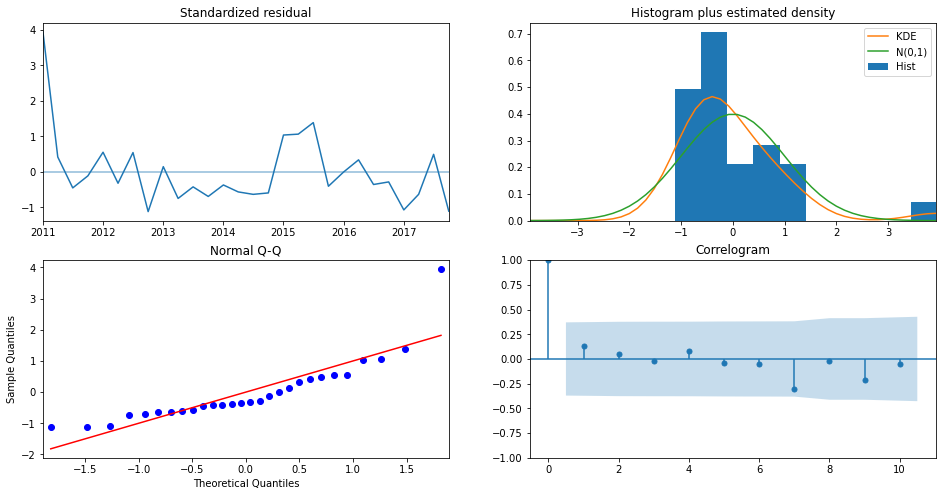

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


                              AutoReg Model Results                               
Dep. Variable:     Consumer Discretionary   No. Observations:                   32
Model:                         AutoReg(4)   Log Likelihood                -199.994
Method:                   Conditional MLE   S.D. of innovations            306.031
Date:                    Thu, 12 May 2022   AIC                             11.876
Time:                            15:36:02   BIC                             12.161
Sample:                        01-01-2011   HQIC                            11.963
                             - 10-01-2017                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                   151.7658     82.968      1.829      0.067     -10.849     314.381
Consumer Discretionary.L1     0.1586      0.189      0

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


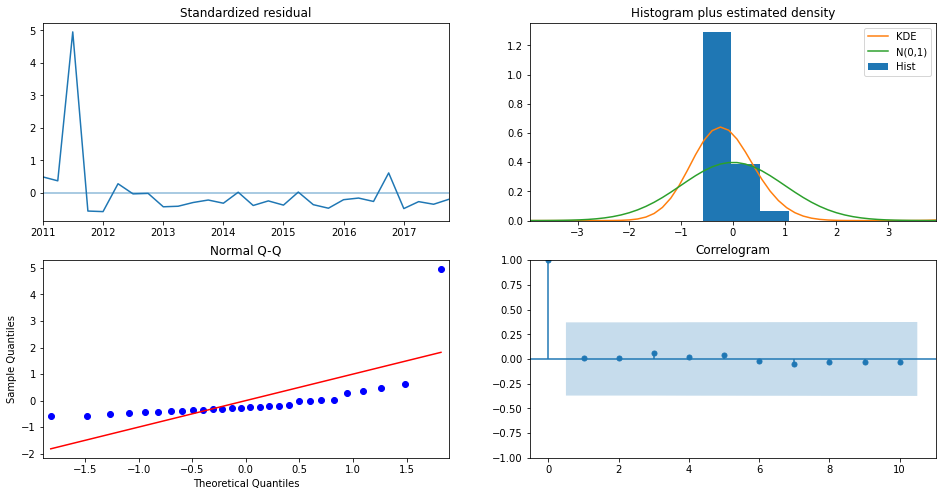

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


                            AutoReg Model Results                             
Dep. Variable:       Consumer Staples   No. Observations:                   32
Model:                     AutoReg(4)   Log Likelihood                -173.690
Method:               Conditional MLE   S.D. of innovations            119.613
Date:                Thu, 12 May 2022   AIC                              9.997
Time:                        15:36:03   BIC                             10.283
Sample:                    01-01-2011   HQIC                            10.084
                         - 10-01-2017                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept             153.1292     44.758      3.421      0.001      65.405     240.854
Consumer Staples.L1     0.1943      0.177      1.096      0.273      -0.153       0.542
Consumer Staples

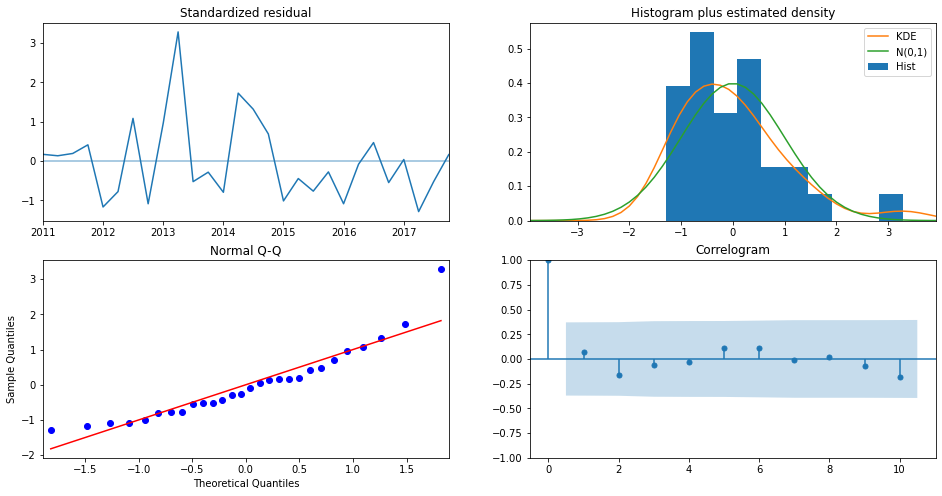

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


                            AutoReg Model Results                             
Dep. Variable:                 Energy   No. Observations:                   32
Model:                     AutoReg(4)   Log Likelihood                -221.250
Method:               Conditional MLE   S.D. of innovations            653.840
Date:                Thu, 12 May 2022   AIC                             13.394
Time:                        15:36:04   BIC                             13.680
Sample:                    01-01-2011   HQIC                            13.482
                         - 10-01-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    349.6442    234.717      1.490      0.136    -110.392     809.681
Energy.L1      0.3835      0.173      2.219      0.027       0.045       0.722
Energy.L2     -0.1615      0.187     -0.865      0.3

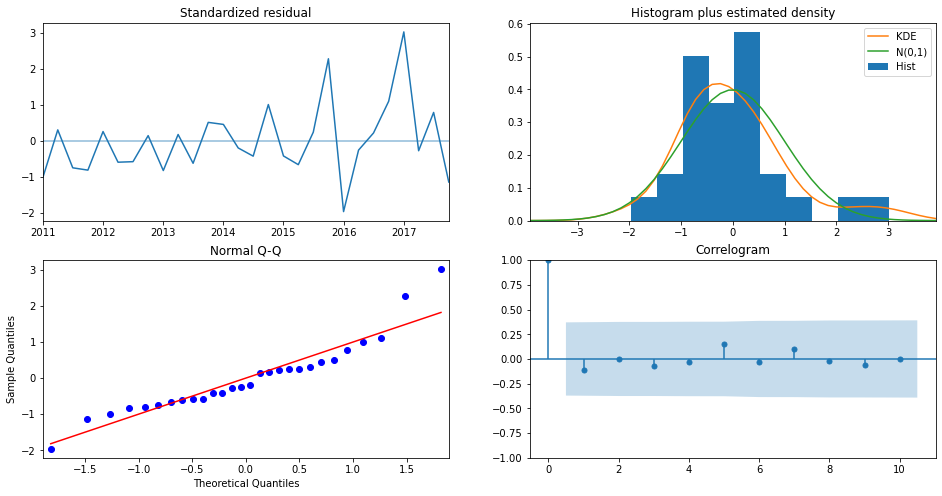

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


                            AutoReg Model Results                             
Dep. Variable:             Financials   No. Observations:                   32
Model:                     AutoReg(4)   Log Likelihood                -198.366
Method:               Conditional MLE   S.D. of innovations            288.753
Date:                Thu, 12 May 2022   AIC                             11.760
Time:                        15:36:05   BIC                             12.045
Sample:                    01-01-2011   HQIC                            11.847
                         - 10-01-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept       289.1582     84.222      3.433      0.001     124.087     454.229
Financials.L1    -0.0645      0.117     -0.553      0.581      -0.293       0.164
Financials.L2    -0.0492      0.110     

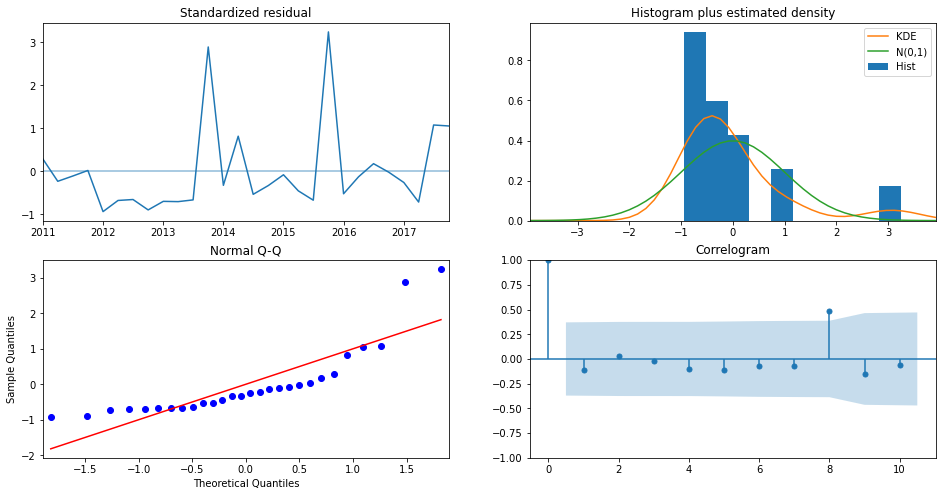

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


                            AutoReg Model Results                             
Dep. Variable:            Health Care   No. Observations:                   32
Model:                     AutoReg(4)   Log Likelihood                -156.620
Method:               Conditional MLE   S.D. of innovations             65.015
Date:                Thu, 12 May 2022   AIC                              8.778
Time:                        15:36:05   BIC                              9.063
Sample:                    01-01-2011   HQIC                             8.865
                         - 10-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept        149.1904     48.359      3.085      0.002      54.409     243.972
Health Care.L1    -0.0377      0.191     -0.197      0.844      -0.412       0.337
Health Care.L2    -0.2041      0.142

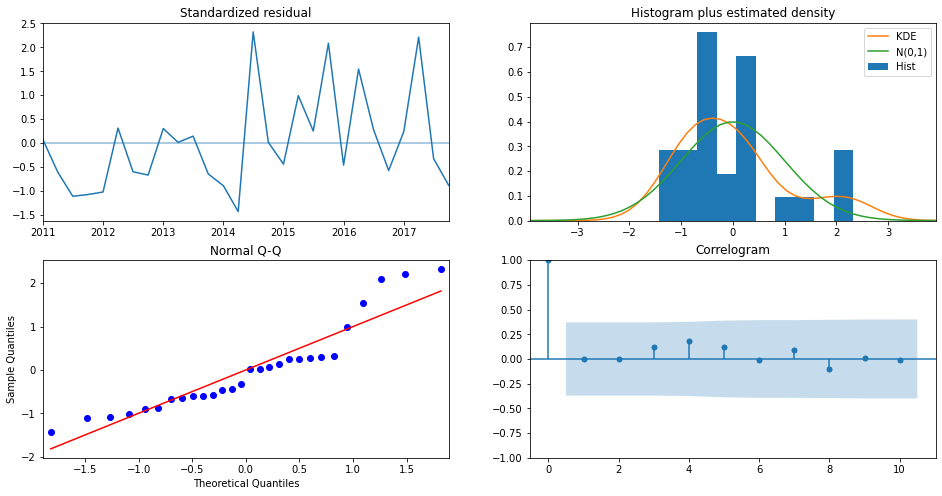

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


                            AutoReg Model Results                             
Dep. Variable:            Industrials   No. Observations:                   32
Model:                     AutoReg(4)   Log Likelihood                -207.995
Method:               Conditional MLE   S.D. of innovations            407.261
Date:                Thu, 12 May 2022   AIC                             12.447
Time:                        15:36:07   BIC                             12.733
Sample:                    01-01-2011   HQIC                            12.535
                         - 10-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept        215.9188    129.753      1.664      0.096     -38.392     470.230
Industrials.L1    -0.0338      0.187     -0.181      0.856      -0.400       0.332
Industrials.L2     0.4884      0.187

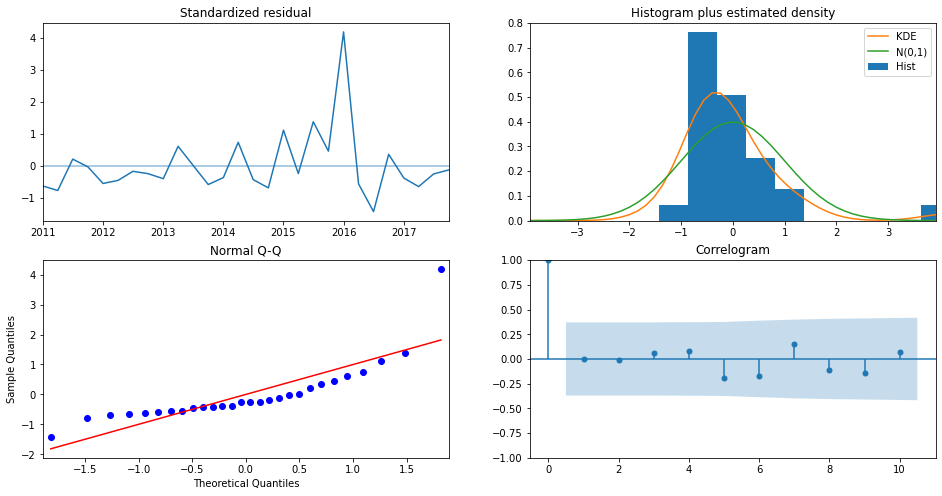

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


                              AutoReg Model Results                               
Dep. Variable:     Information Technology   No. Observations:                   32
Model:                         AutoReg(4)   Log Likelihood                -163.964
Method:                   Conditional MLE   S.D. of innovations             84.514
Date:                    Thu, 12 May 2022   AIC                              9.302
Time:                            15:36:08   BIC                              9.588
Sample:                        01-01-2011   HQIC                             9.390
                             - 10-01-2017                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                    54.7175     30.230      1.810      0.070      -4.533     113.968
Information Technology.L1     0.1351      0.219      0

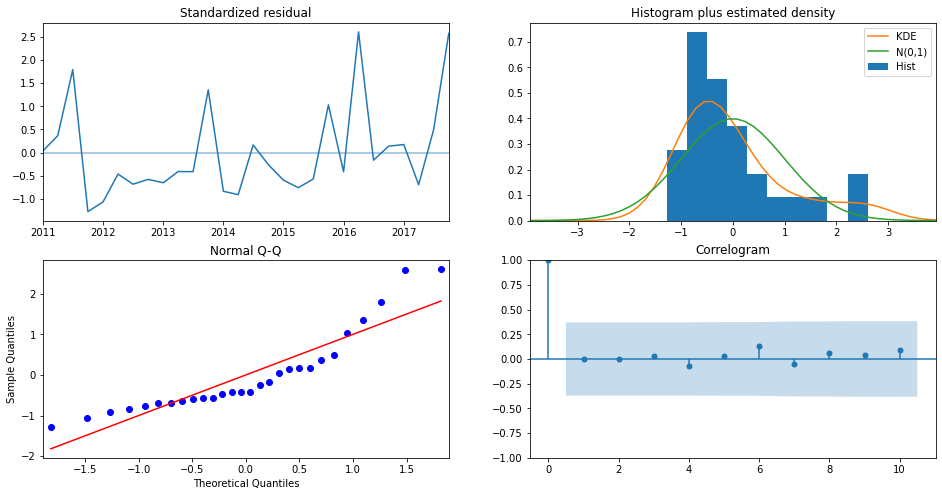

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


                            AutoReg Model Results                             
Dep. Variable:              Materials   No. Observations:                   32
Model:                     AutoReg(4)   Log Likelihood                -218.423
Method:               Conditional MLE   S.D. of innovations            591.036
Date:                Thu, 12 May 2022   AIC                             13.192
Time:                        15:36:09   BIC                             13.478
Sample:                    01-01-2011   HQIC                            13.280
                         - 10-01-2017                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      461.6019    193.769      2.382      0.017      81.821     841.383
Materials.L1    -0.0656      0.188     -0.348      0.728      -0.435       0.304
Materials.L2    -0.0798      0.187     -0.42

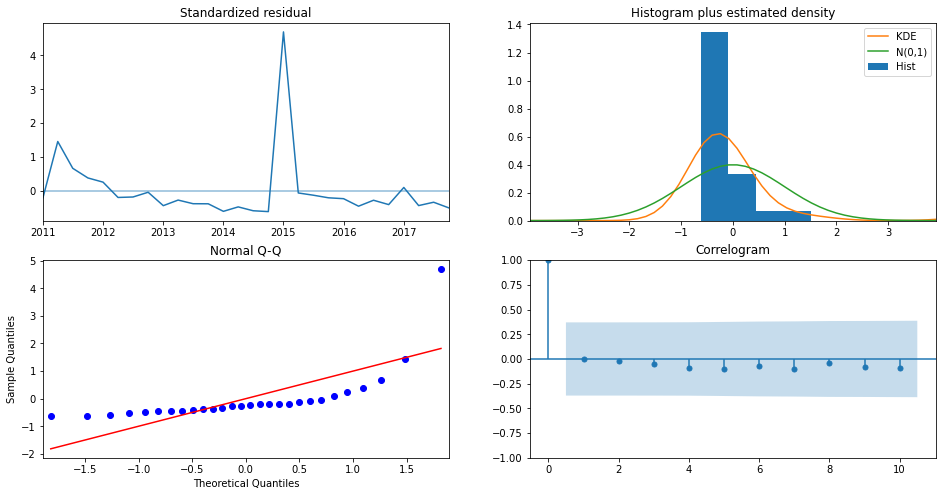

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


                            AutoReg Model Results                             
Dep. Variable:            Real Estate   No. Observations:                   32
Model:                     AutoReg(4)   Log Likelihood                -259.198
Method:               Conditional MLE   S.D. of innovations           2535.443
Date:                Thu, 12 May 2022   AIC                             16.105
Time:                        15:36:10   BIC                             16.390
Sample:                    01-01-2011   HQIC                            16.192
                         - 10-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept       1384.4273    630.409      2.196      0.028     148.849    2620.005
Real Estate.L1    -0.1727      0.284     -0.608      0.543      -0.729       0.384
Real Estate.L2    -0.1234      0.284

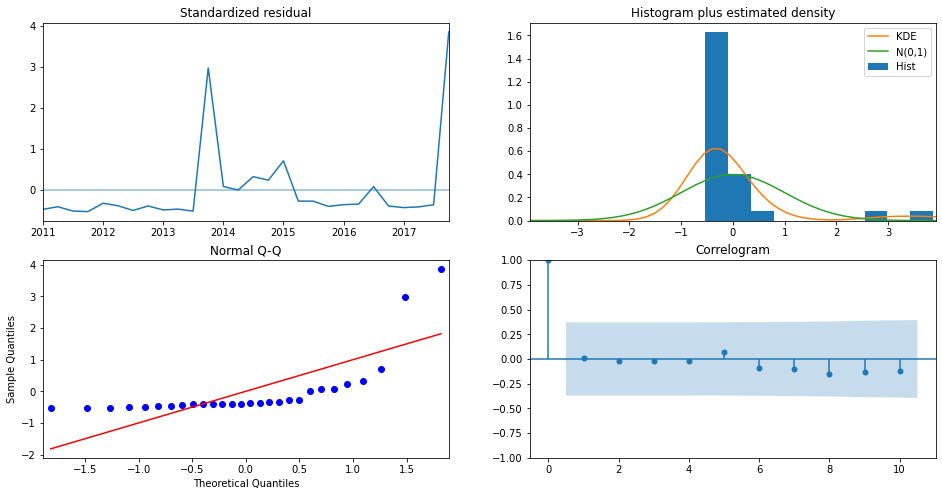

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


                            AutoReg Model Results                             
Dep. Variable:              Utilities   No. Observations:                   32
Model:                     AutoReg(4)   Log Likelihood                -232.687
Method:               Conditional MLE   S.D. of innovations            983.698
Date:                Thu, 12 May 2022   AIC                             14.211
Time:                        15:36:11   BIC                             14.497
Sample:                    01-01-2011   HQIC                            14.298
                         - 10-01-2017                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      451.2046    243.701      1.851      0.064     -26.440     928.849
Utilities.L1     0.1407      0.191      0.737      0.461      -0.233       0.515
Utilities.L2    -0.0376      0.187     -0.20

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


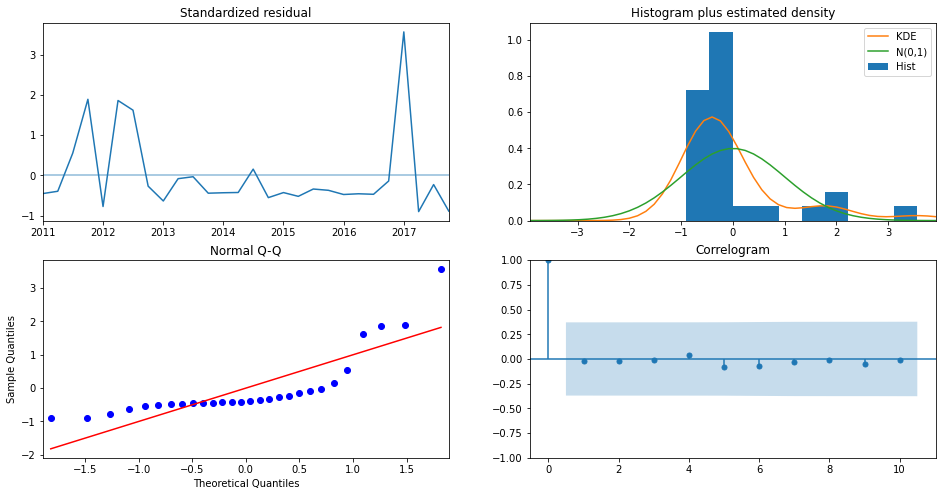

In [18]:
industry_list = History_value.columns

for industry in industry_list:
    model_AR = AutoReg(y_to_train[industry], lags=4).fit()
    print(model_AR.summary())
    model_AR.plot_diagnostics(figsize=(16, 8))
    plt.show()
## apparently the model itself needs some improvements. the residuals are not N(0,1) distributed.or zero meaned

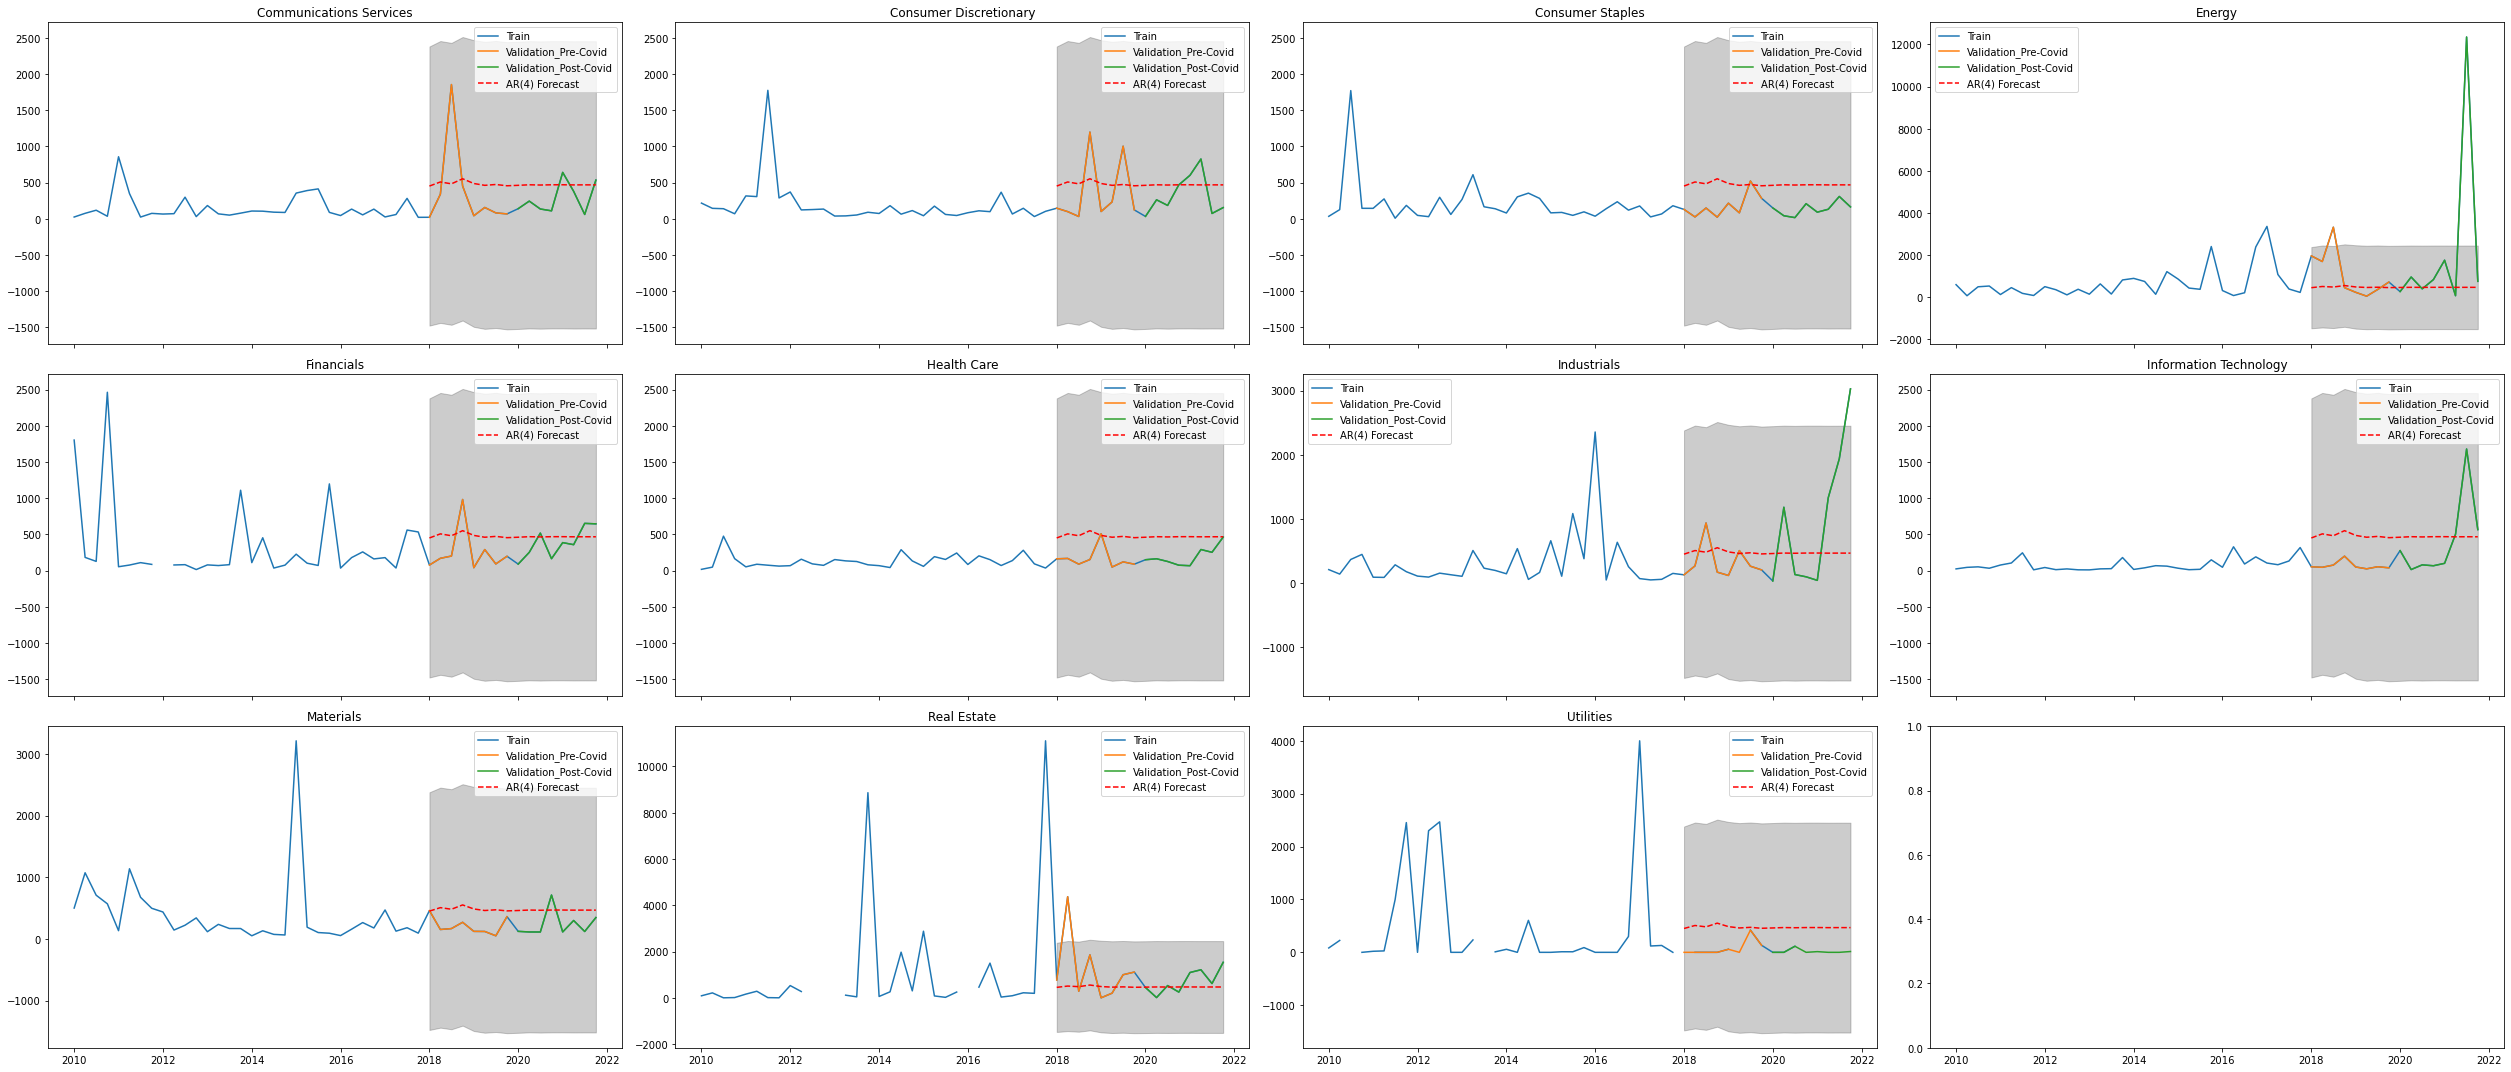

In [19]:
industry_list = History_value.columns

row_count = len(History_value[industry])

fig, axes = plt.subplots(ncols=min(len(industry_list), 4), nrows=len(industry_list)//4+1, sharex=True, figsize=(35,15))
i = 0


## WIP - store pred_mean and pred_ci
pred_mean_df = 0
pred_ci_df = 0


for industry in industry_list:

    # results_AR.summary()
    pred_mean=model_AR.predict(start=len(y_to_train[industry]), end=row_count-1, dynamic=True)
    prediction_obj=model_AR.get_prediction(start=len(y_to_train[industry]), end=row_count-1, dynamic=True)
    pred_ci = prediction_obj.conf_int()

    axes[i//4,i%4].plot(History_value[industry], label='Train')
    axes[i//4,i%4].plot(y_to_test_precovid[industry], label='Validation_Pre-Covid')
    axes[i//4,i%4].plot(y_to_test_covid[industry], label='Validation_Post-Covid')
    axes[i//4,i%4].plot(pred_mean, label='AR(4) Forecast',color='red',linestyle='--')
    axes[i//4,i%4].fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)
    axes[i//4,i%4].set_title(f'{industry}')
    axes[i//4,i%4].legend(loc='best')
    
    i += 1

plt.tight_layout()
plt.show()


In [20]:
# Root MSE -- AR(1) and MA(1)

industry_list = History_value.columns
RMSE_AR_df = pd.DataFrame(index=['RMSE_AR']) #stores Root MSE for industries

for industry in industry_list:
    pred_mean=model_AR.predict(start=len(y_to_train[industry]), end=row_count-1, dynamic=True)
    rmse_AR = sqrt(mean_squared_error(predict_date_range[industry], pred_mean))
    RMSE_AR_df[industry] = rmse_AR

RMSE_AR_df

Communications Services  Consumer Discretionary  Consumer Staples  \
RMSE_AR               454.498706              369.232125        345.242533   

              Energy  Financials  Health Care  Industrials  \
RMSE_AR  3119.158806  287.383307   319.881485   841.200752   

         Information Technology   Materials  Real Estate   Utilities  
RMSE_AR              471.476276  301.269826   1121.73529  441.820394

# Method 3 - SARIMA model - manually select pdq

In [21]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)


In [22]:
industry_list = History_value.columns

AIC_results=[]
param_results=[]
param_seasonal_results=[]
optimal_pdq_list = pd.DataFrame(index=['Order', 'Seasonal Order'],columns=History_value.columns)

for industry in industry_list:
    min_aic = float('inf')
    for param in pdq:
        for param_seasonal in seasonal_pdq:
                mod = sm.tsa.statespace.SARIMAX(y_to_train[industry],
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                param_results.append(param)
                param_seasonal_results.append(param_seasonal)
                AIC_results.append(results.aic)
                if results.aic < min_aic:
                    optimal_pdq_list[industry] = [param, param_seasonal]
                    min_aic = results.aic

#print('ARIMA{}x{}4 - AIC :{}'.format(param_results[-1], param_seasonal_results[-1], AIC_results[-1]))
optimal_pdq_list

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: C

Communications Services Consumer Discretionary  \
Order                        (0, 1, 1)              (0, 1, 1)   
Seasonal Order            (0, 1, 1, 4)           (0, 1, 1, 4)   

               Consumer Staples        Energy    Financials   Health Care  \
Order                 (0, 1, 1)     (0, 1, 1)     (0, 1, 1)     (0, 1, 1)   
Seasonal Order     (1, 1, 1, 4)  (0, 1, 1, 4)  (0, 1, 1, 4)  (1, 1, 1, 4)   

                 Industrials Information Technology     Materials  \
Order              (1, 1, 1)              (0, 1, 1)     (0, 1, 1)   
Seasonal Order  (0, 1, 1, 4)           (0, 1, 1, 4)  (0, 1, 1, 4)   

                 Real Estate     Utilities  
Order              (0, 1, 1)     (0, 1, 1)  
Seasonal Order  (1, 1, 1, 4)  (0, 1, 1, 4)

In [23]:
optimal_pdq_list
optimal_pdq_list.loc['Order',[industry]][0]


(0, 1, 1)

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


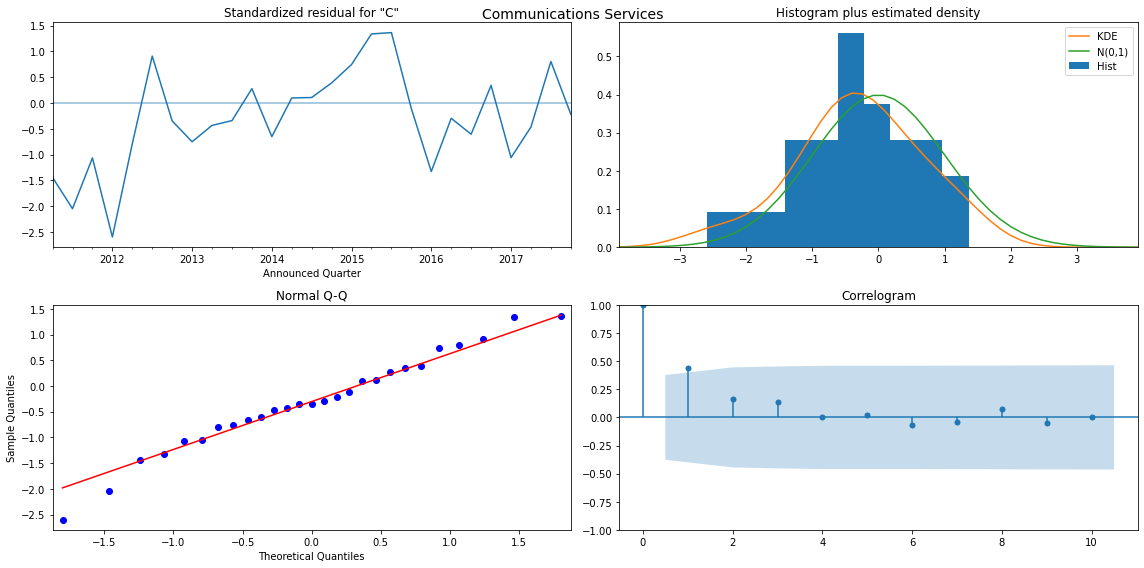

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


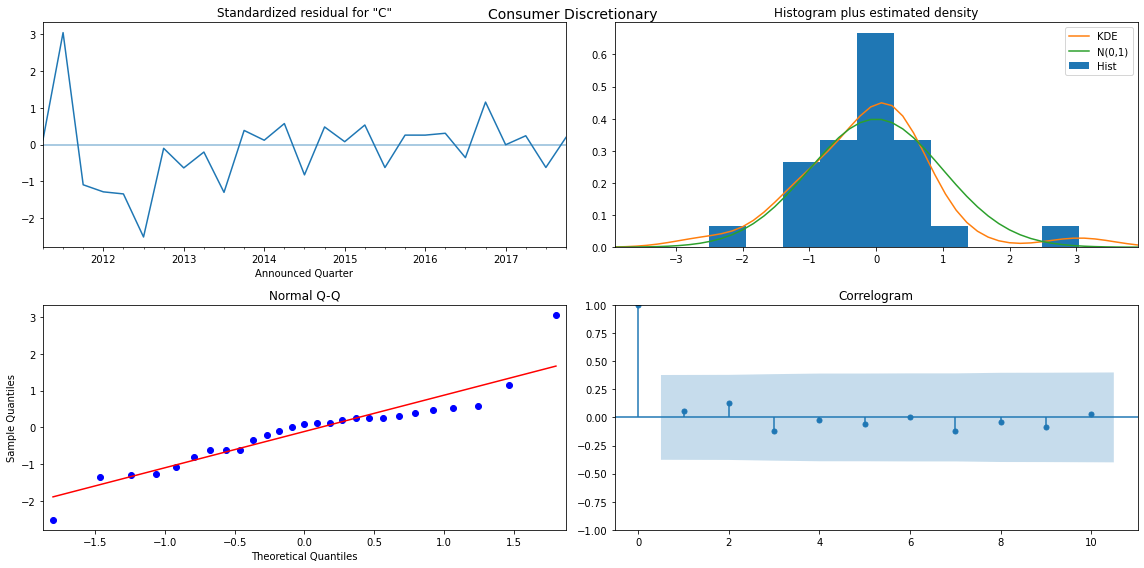

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


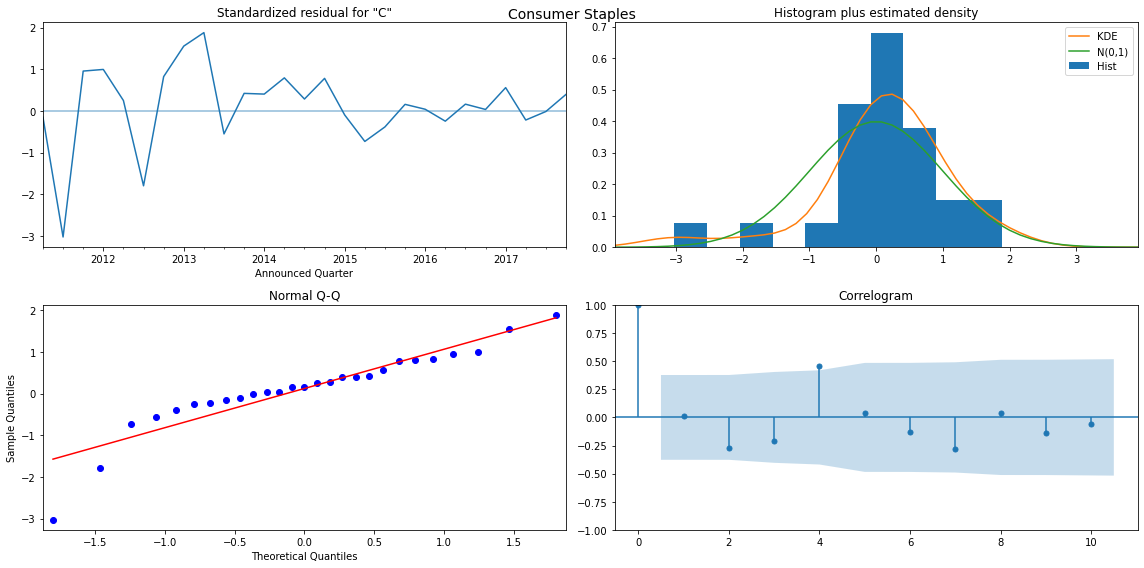

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


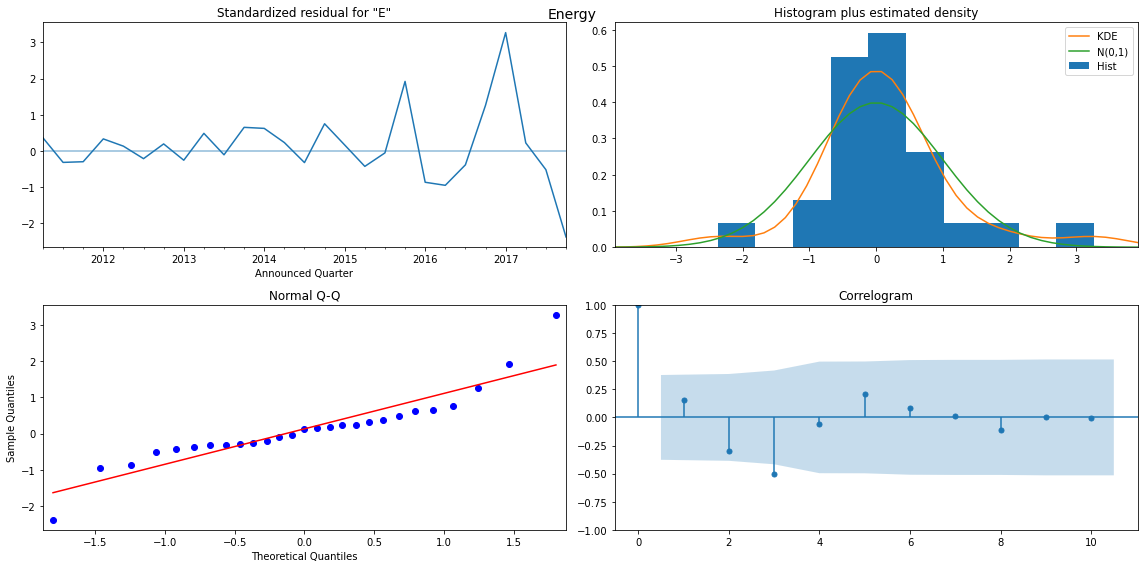

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


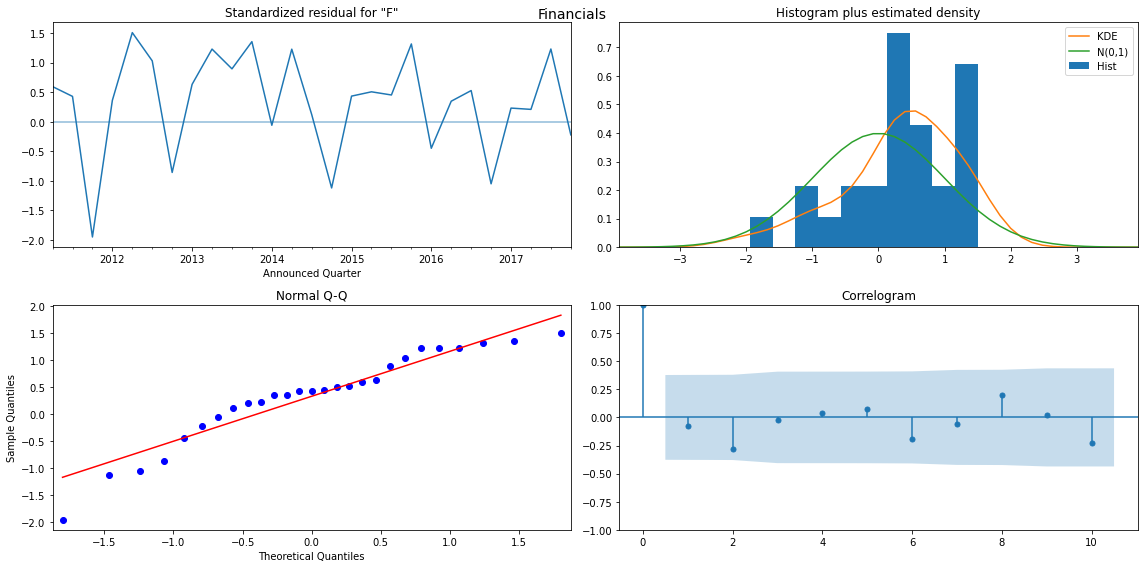

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


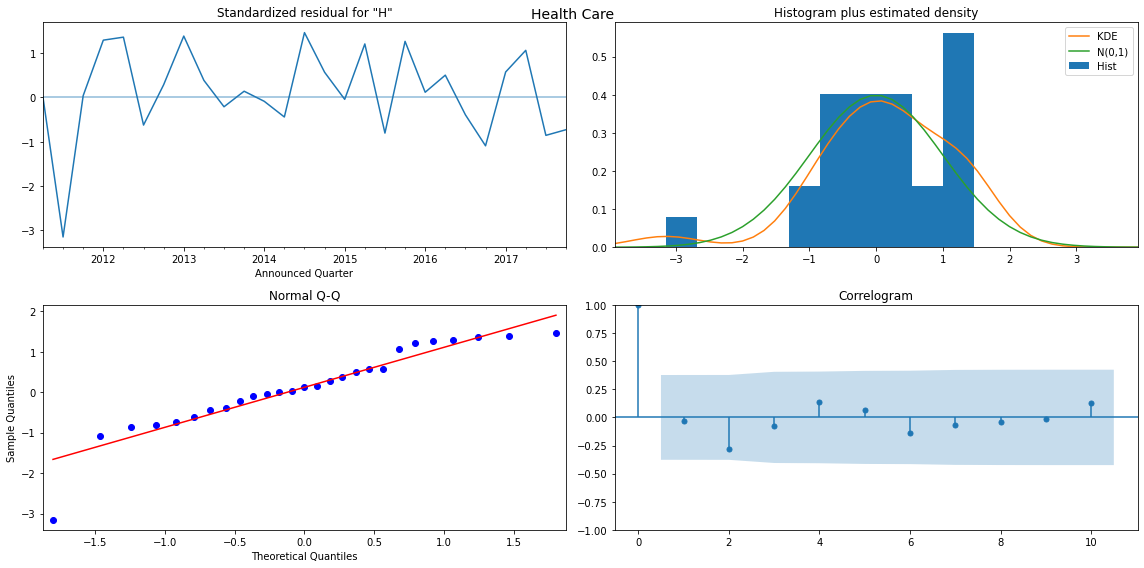

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


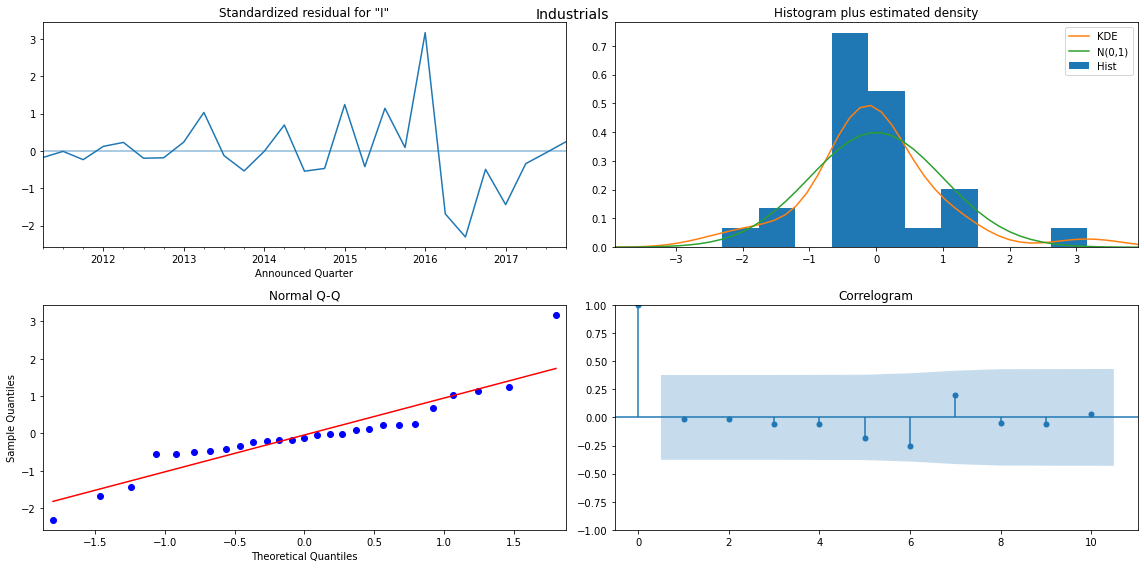

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


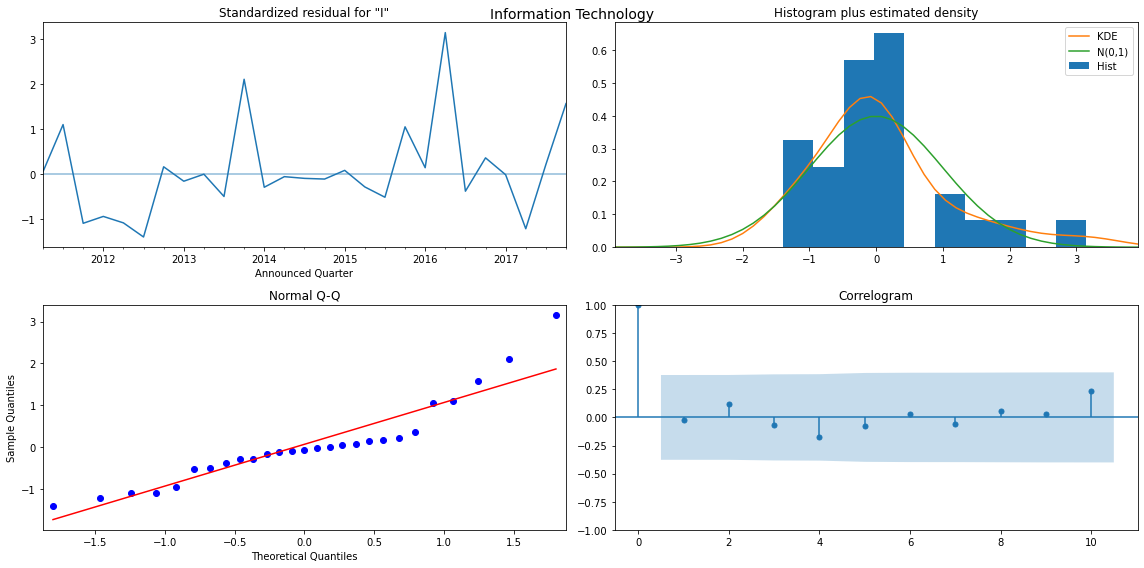

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


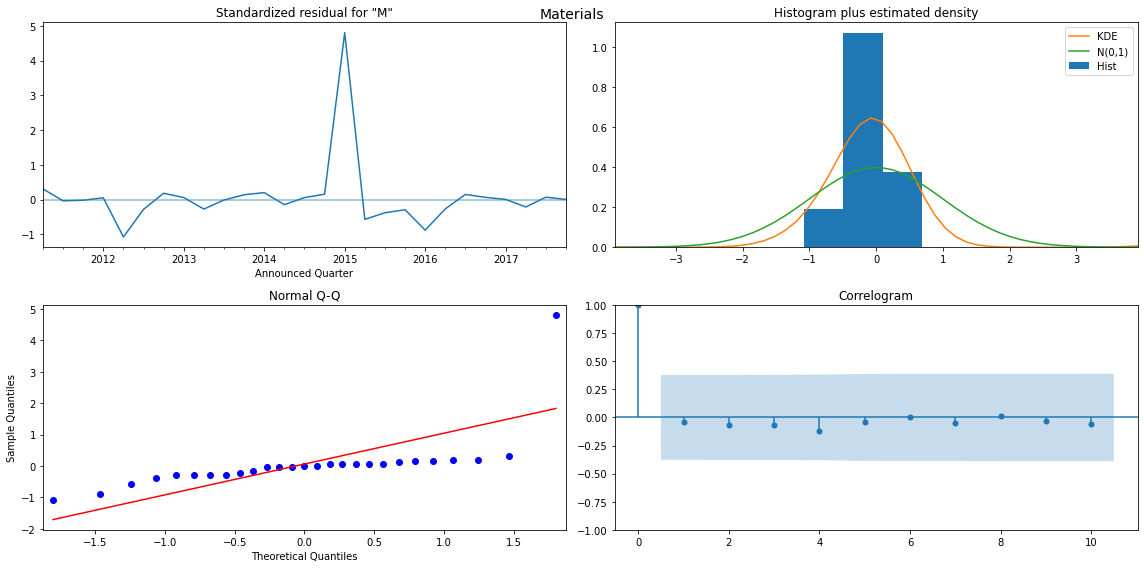

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


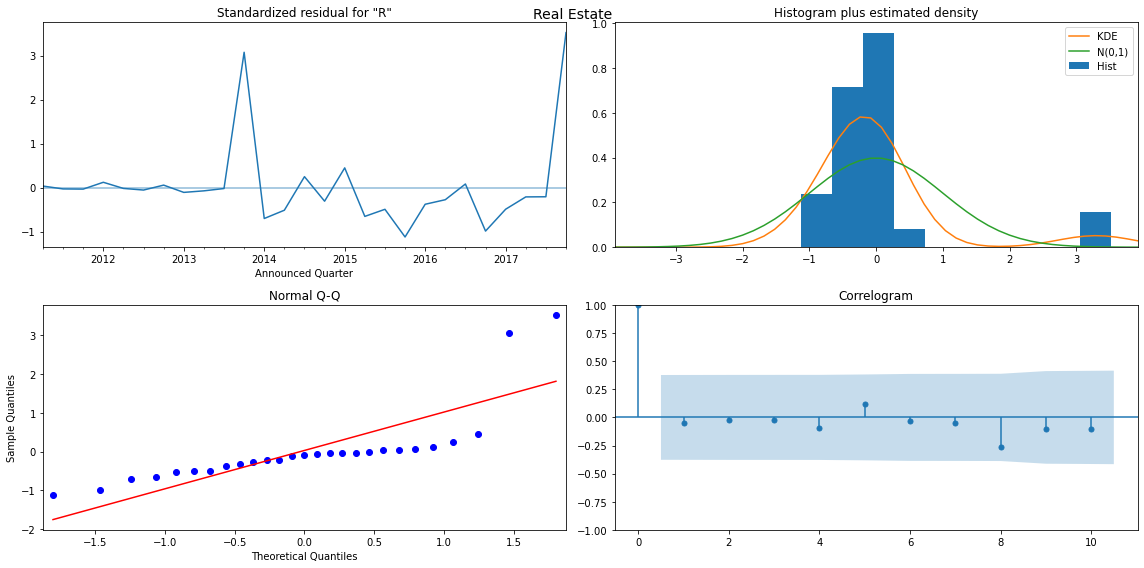

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


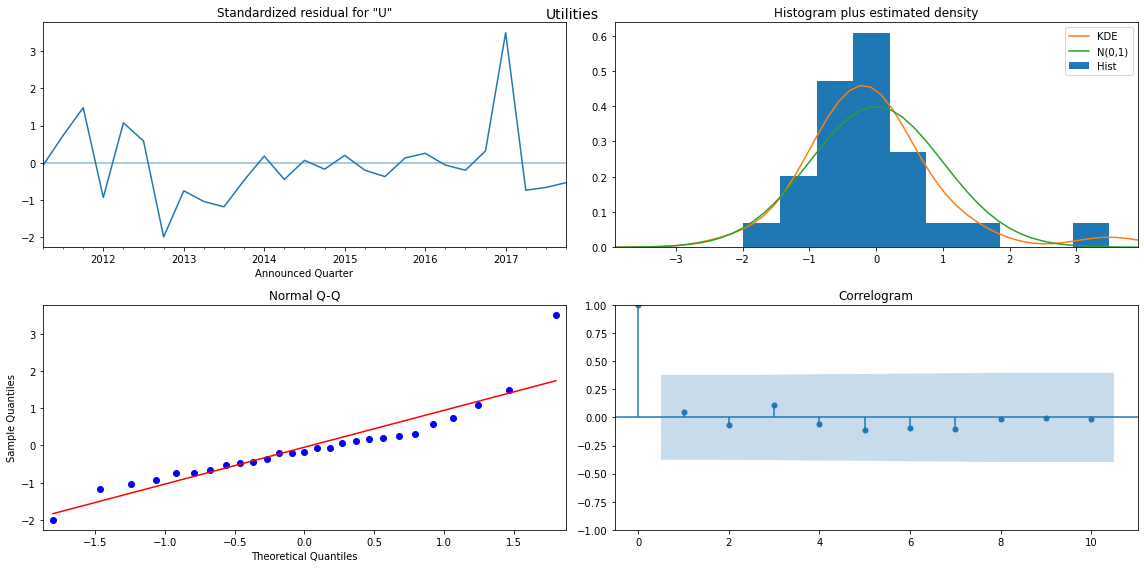

In [24]:
industry_list = History_value.columns
for industry in industry_list:
    model_SARIMA = sm.tsa.statespace.SARIMAX(y_to_train[industry], 
                                            order=optimal_pdq_list.loc['Order',[industry]][0],
                                            seasonal_order=optimal_pdq_list.loc['Seasonal Order',[industry]][0],
                                            enforce_stationarity=True,
                                            enforce_invertibility=True).fit()

    model_SARIMA.plot_diagnostics(figsize=(16, 8))
    plt.tight_layout()
    plt.suptitle(f"{industry}",fontsize=14)
    plt.show()

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\alannguyen\Anaconda3\lib\site-p

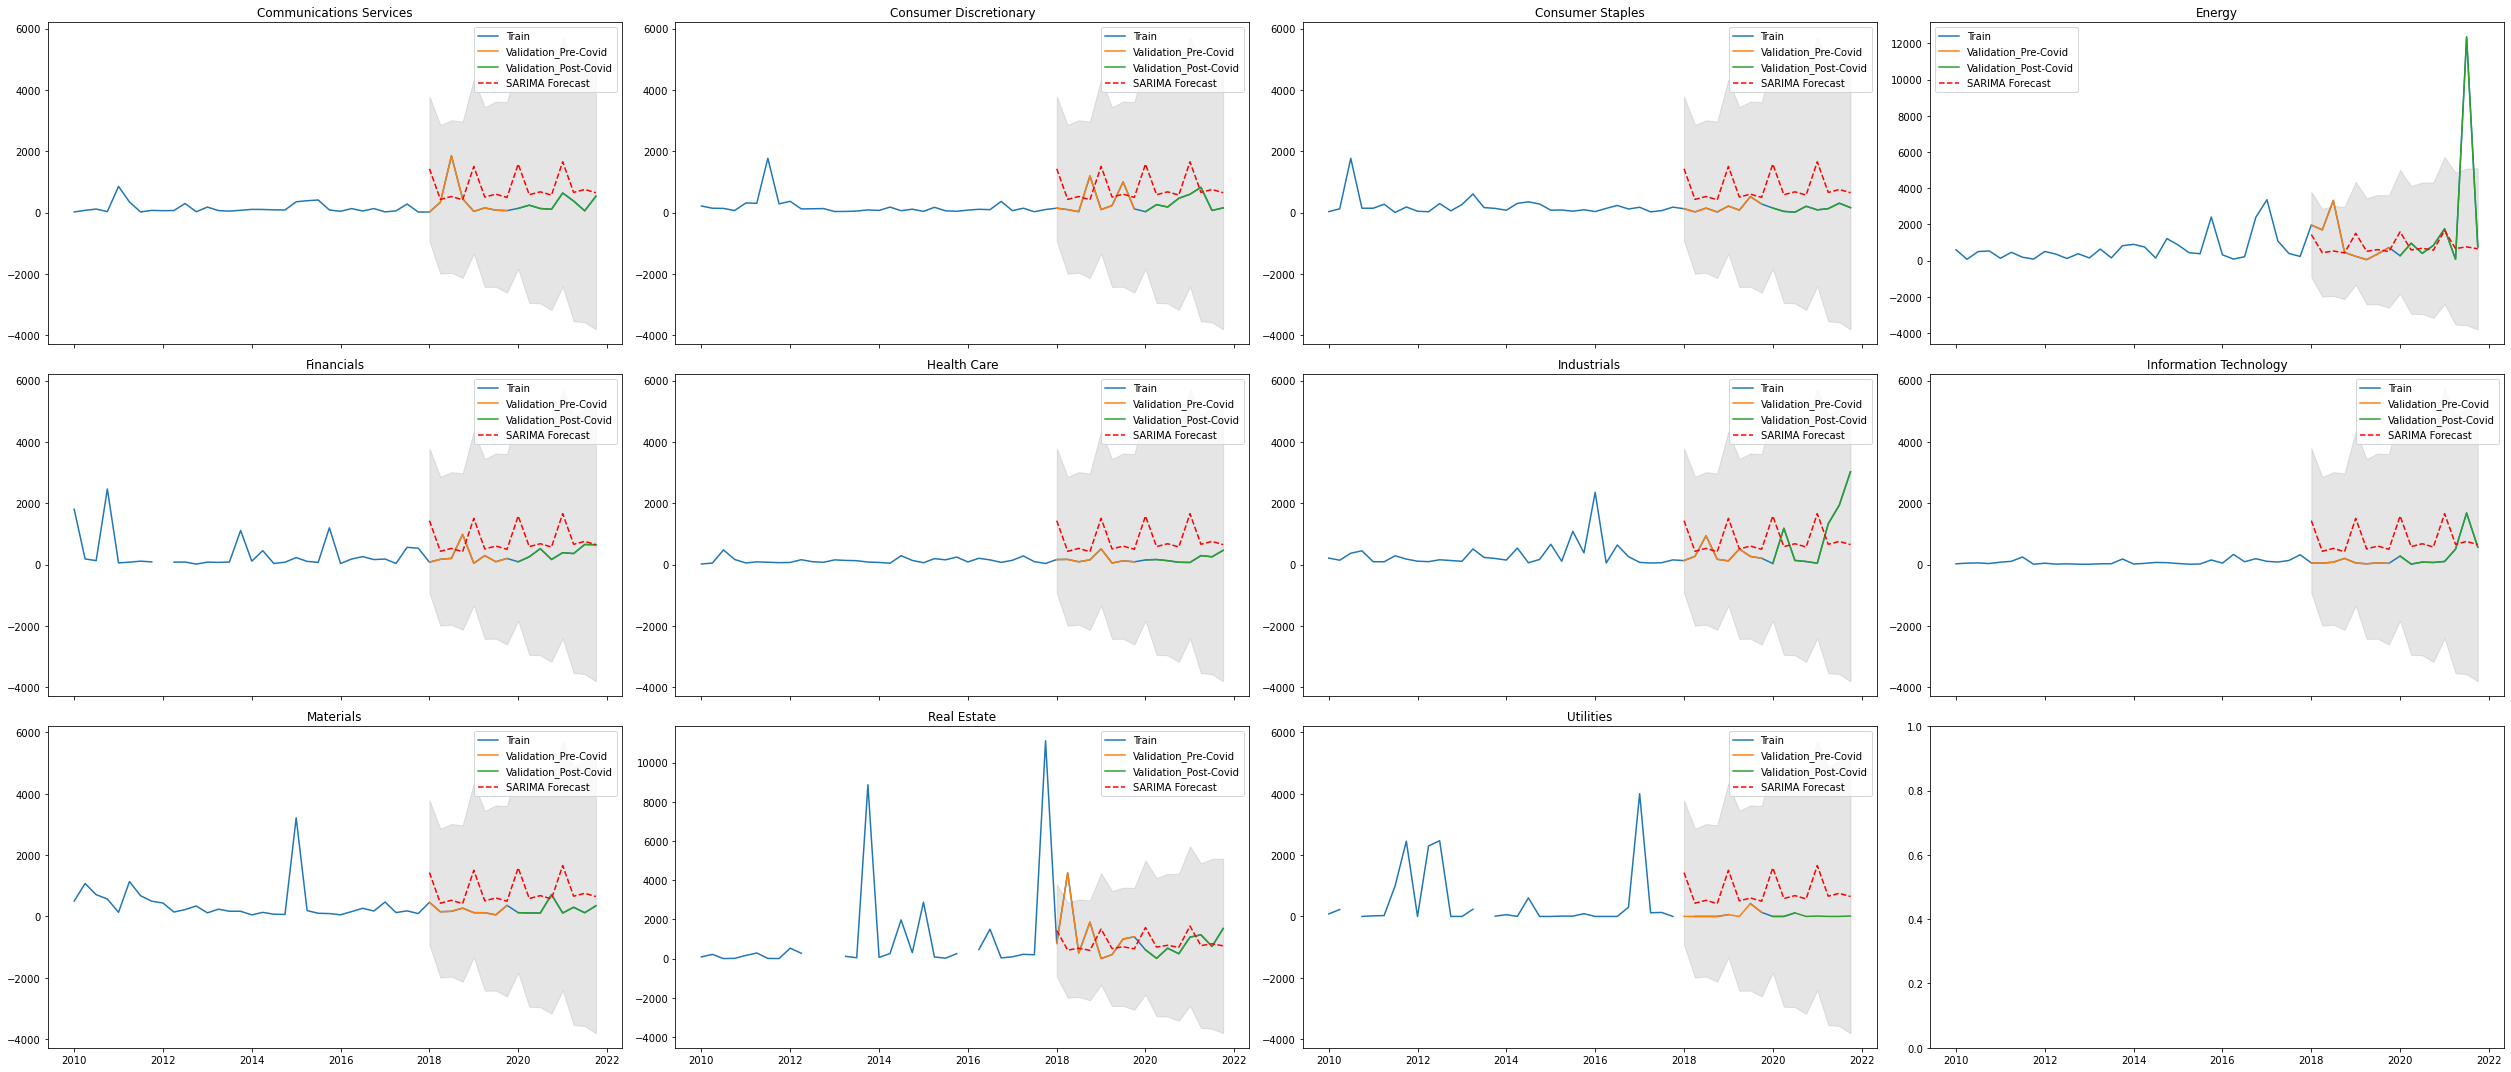

In [25]:

# this plot have both pointwise prediction and CI. using SARIMA model
industry_list = History_value.columns
row_count = len(History_value[industry])
fig, axes = plt.subplots(ncols=min(len(industry_list), 4), nrows=len(industry_list)//4+1, sharex=True, figsize=(35,15))
i = 0

for industry in industry_list:
    pred_mean=model_SARIMA.predict(start=len(y_to_train[industry]), end=row_count-1, dynamic=True)
    pred_obj = model_SARIMA.get_prediction(start='2018-01-01', end='2021-10-01', dynamic=True)
    pred_ci = pred_obj.conf_int()

    axes[i//4,i%4].plot(History_value[industry], label='Train')
    axes[i//4,i%4].plot(y_to_test_precovid[industry], label='Validation_Pre-Covid')
    axes[i//4,i%4].plot(y_to_test_covid[industry], label='Validation_Post-Covid')
    axes[i//4,i%4].plot(pred_mean, label='SARIMA Forecast',color='red',linestyle='--')
    axes[i//4,i%4].fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1],
                    facecolor="grey", # The fill color
                    color='grey',       # The outline color
                    alpha=0.2)          # Transparency of the fill
    axes[i//4,i%4].set_title(f'{industry}')
    axes[i//4,i%4].legend(loc='best')
    i += 1

plt.tight_layout()
plt.show()


In [26]:
# Root MSE
industry_list = History_value.columns
rmse_SARIMA_df = pd.DataFrame(index=['RMSE_SARIMA']) #stores Root MSE for industries

for industry in industry_list:
    pred_mean=model_SARIMA.predict(start=len(y_to_train[industry]), end=row_count-1, dynamic=True)
    rmse_SARIMA = round(sqrt(mean_squared_error(predict_date_range[industry], pred_mean)),2)
    rmse_SARIMA_df[industry] = rmse_SARIMA

rmse_SARIMA_df

Communications Services  Consumer Discretionary  \
RMSE_SARIMA                   822.25                  774.37   

             Consumer Staples   Energy  Financials  Health Care  Industrials  \
RMSE_SARIMA            797.16  3047.25      754.92       761.38      1044.66   

             Information Technology  Materials  Real Estate  Utilities  
RMSE_SARIMA                  833.82     760.82      1228.35     894.84

# Method 4 - SARIMA model- automatically  select pdq

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


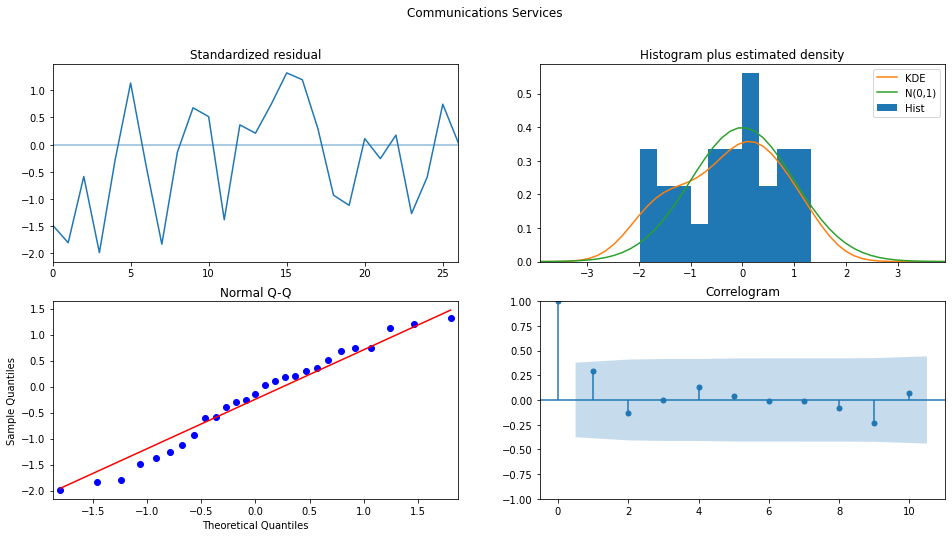

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


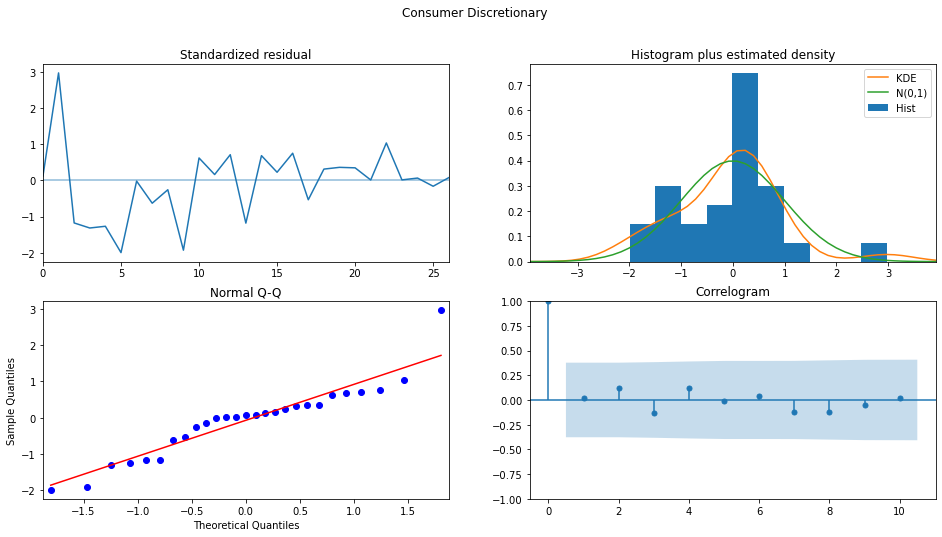

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


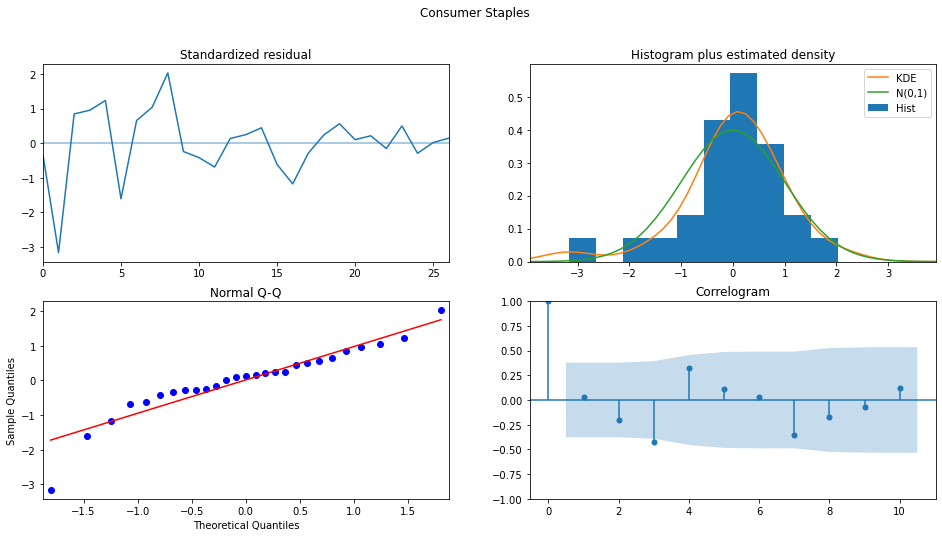

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


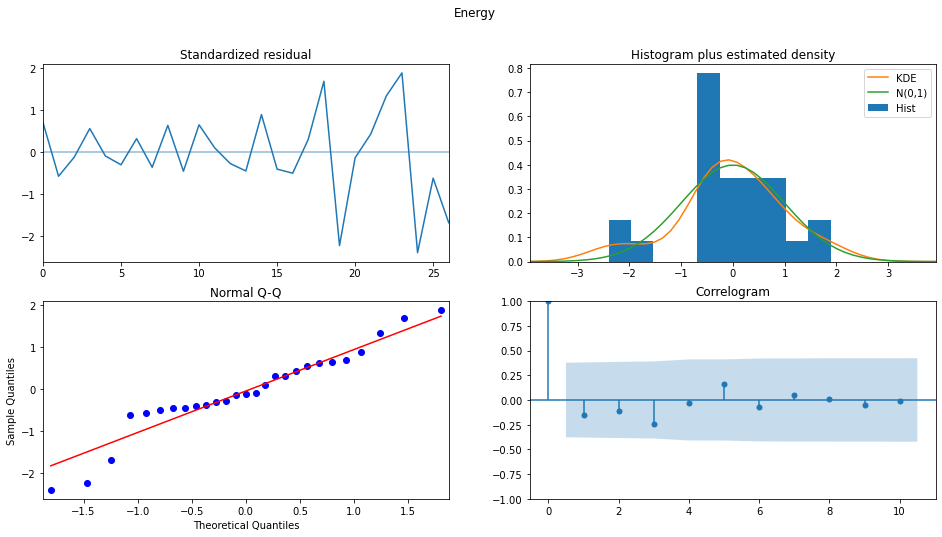

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


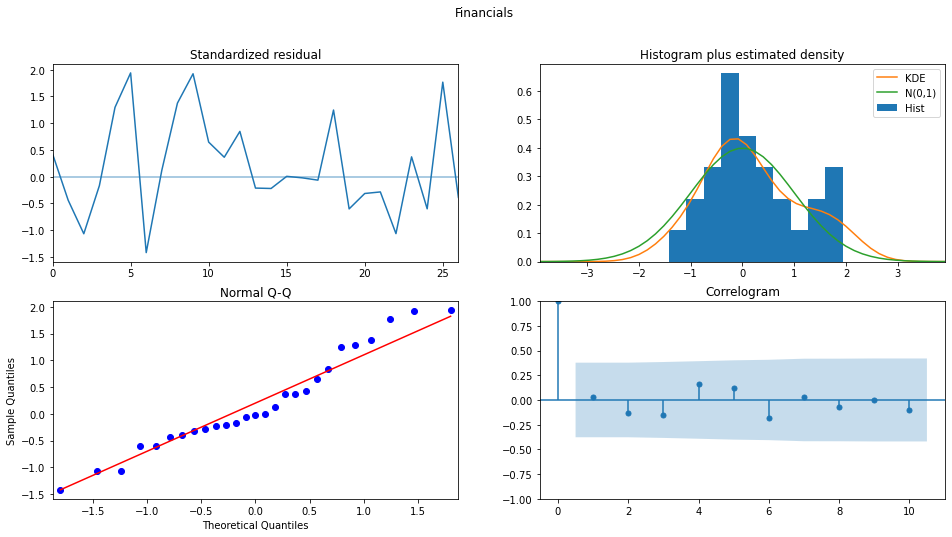

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


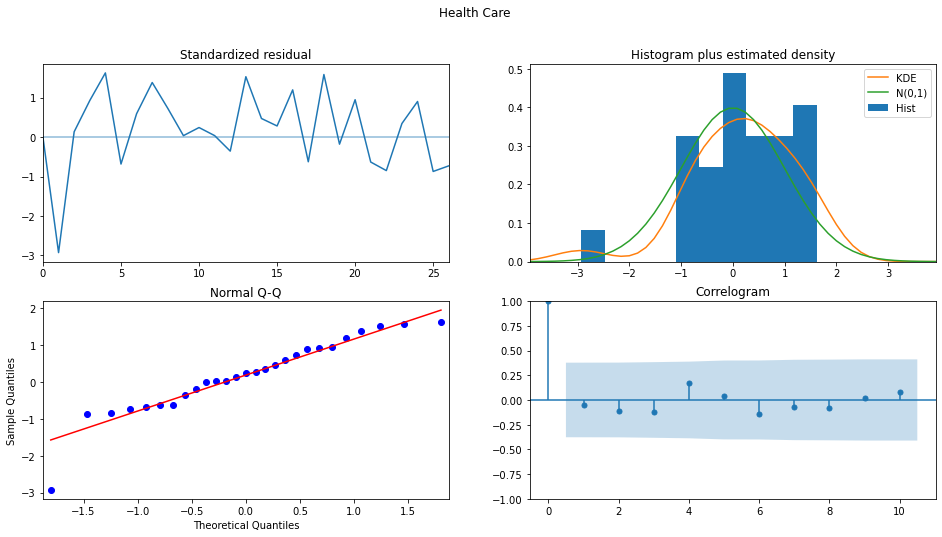

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


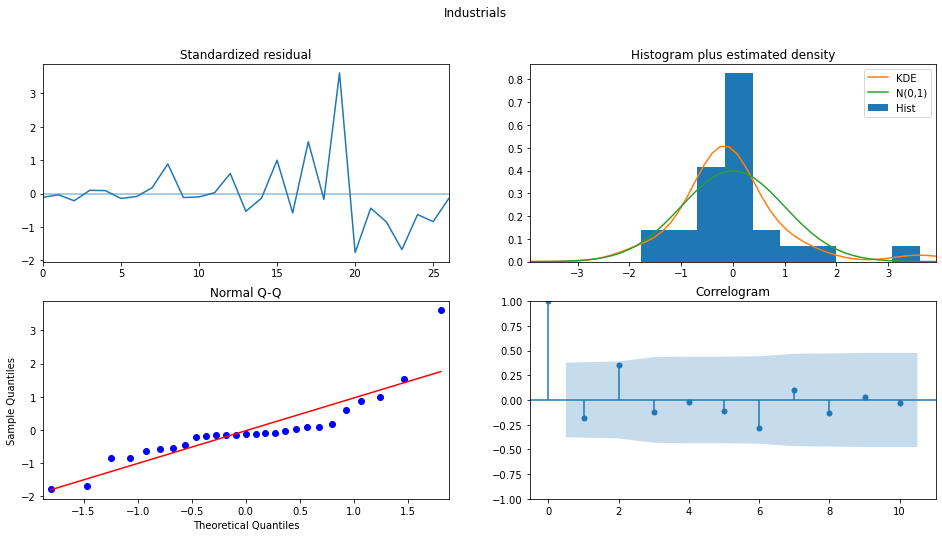

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


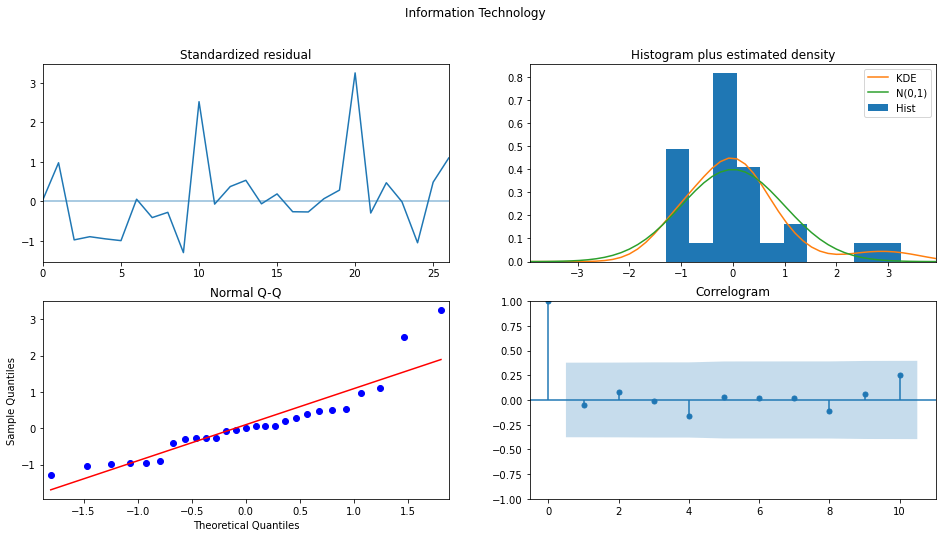

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


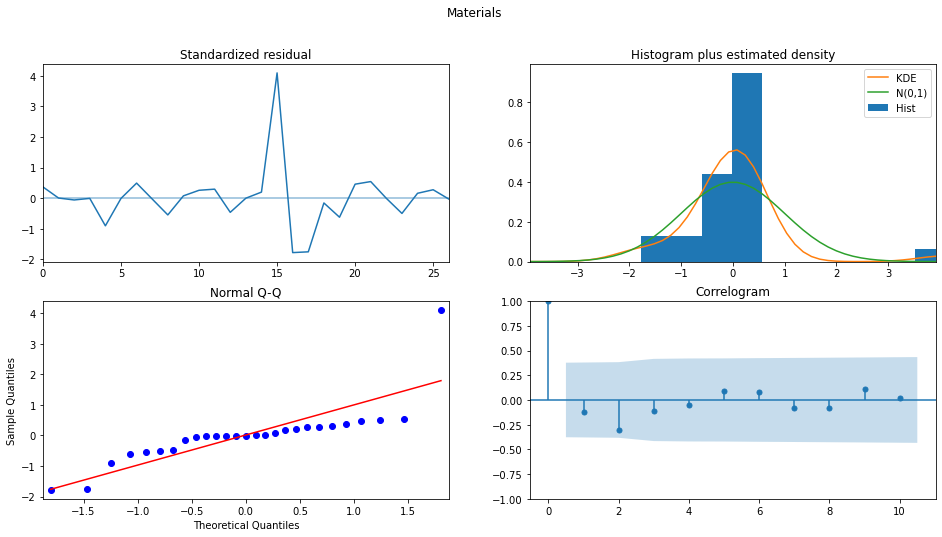

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


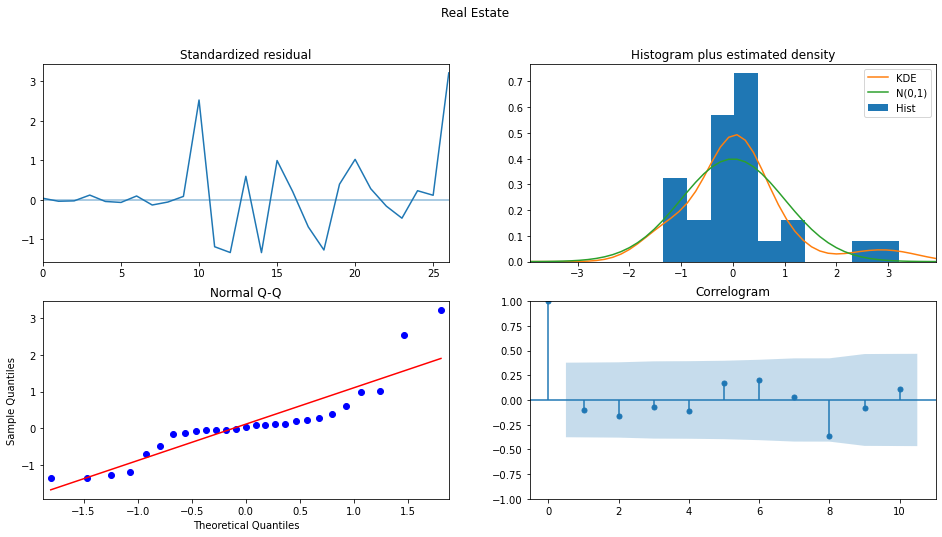

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


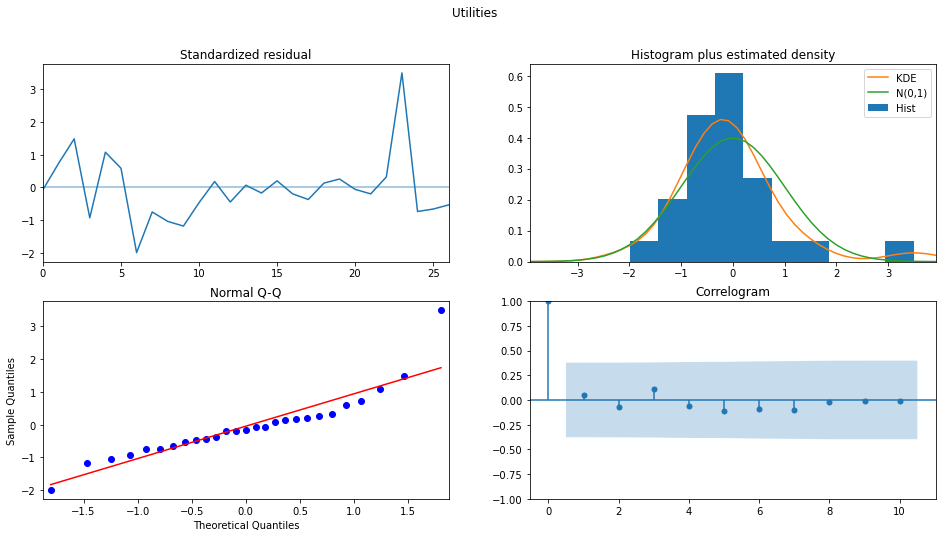

In [27]:
industry_list = History_value.columns
for industry in industry_list:
    # forecast 16 periods including both precovid and covid
    auto_arima_model = auto_arima(y_to_train[industry],d=1,max_d=5,start_p=0,start_q=0,max_p=5,max_q=5,start_P=0,start_Q=0,max_P=5,max_Q=5,D=1,max_D=5,m=4, seasonal=True,error_action='warn',trace=False, supress_warinings=True, stepwise=True,random_state=20,n_fit=50)
    #print(auto_arima_model.summary())
    #0 1 1 2 1 0
    auto_arima_model.plot_diagnostics(figsize=(16, 8))
    plt.suptitle(f'{industry}')
    plt.show()

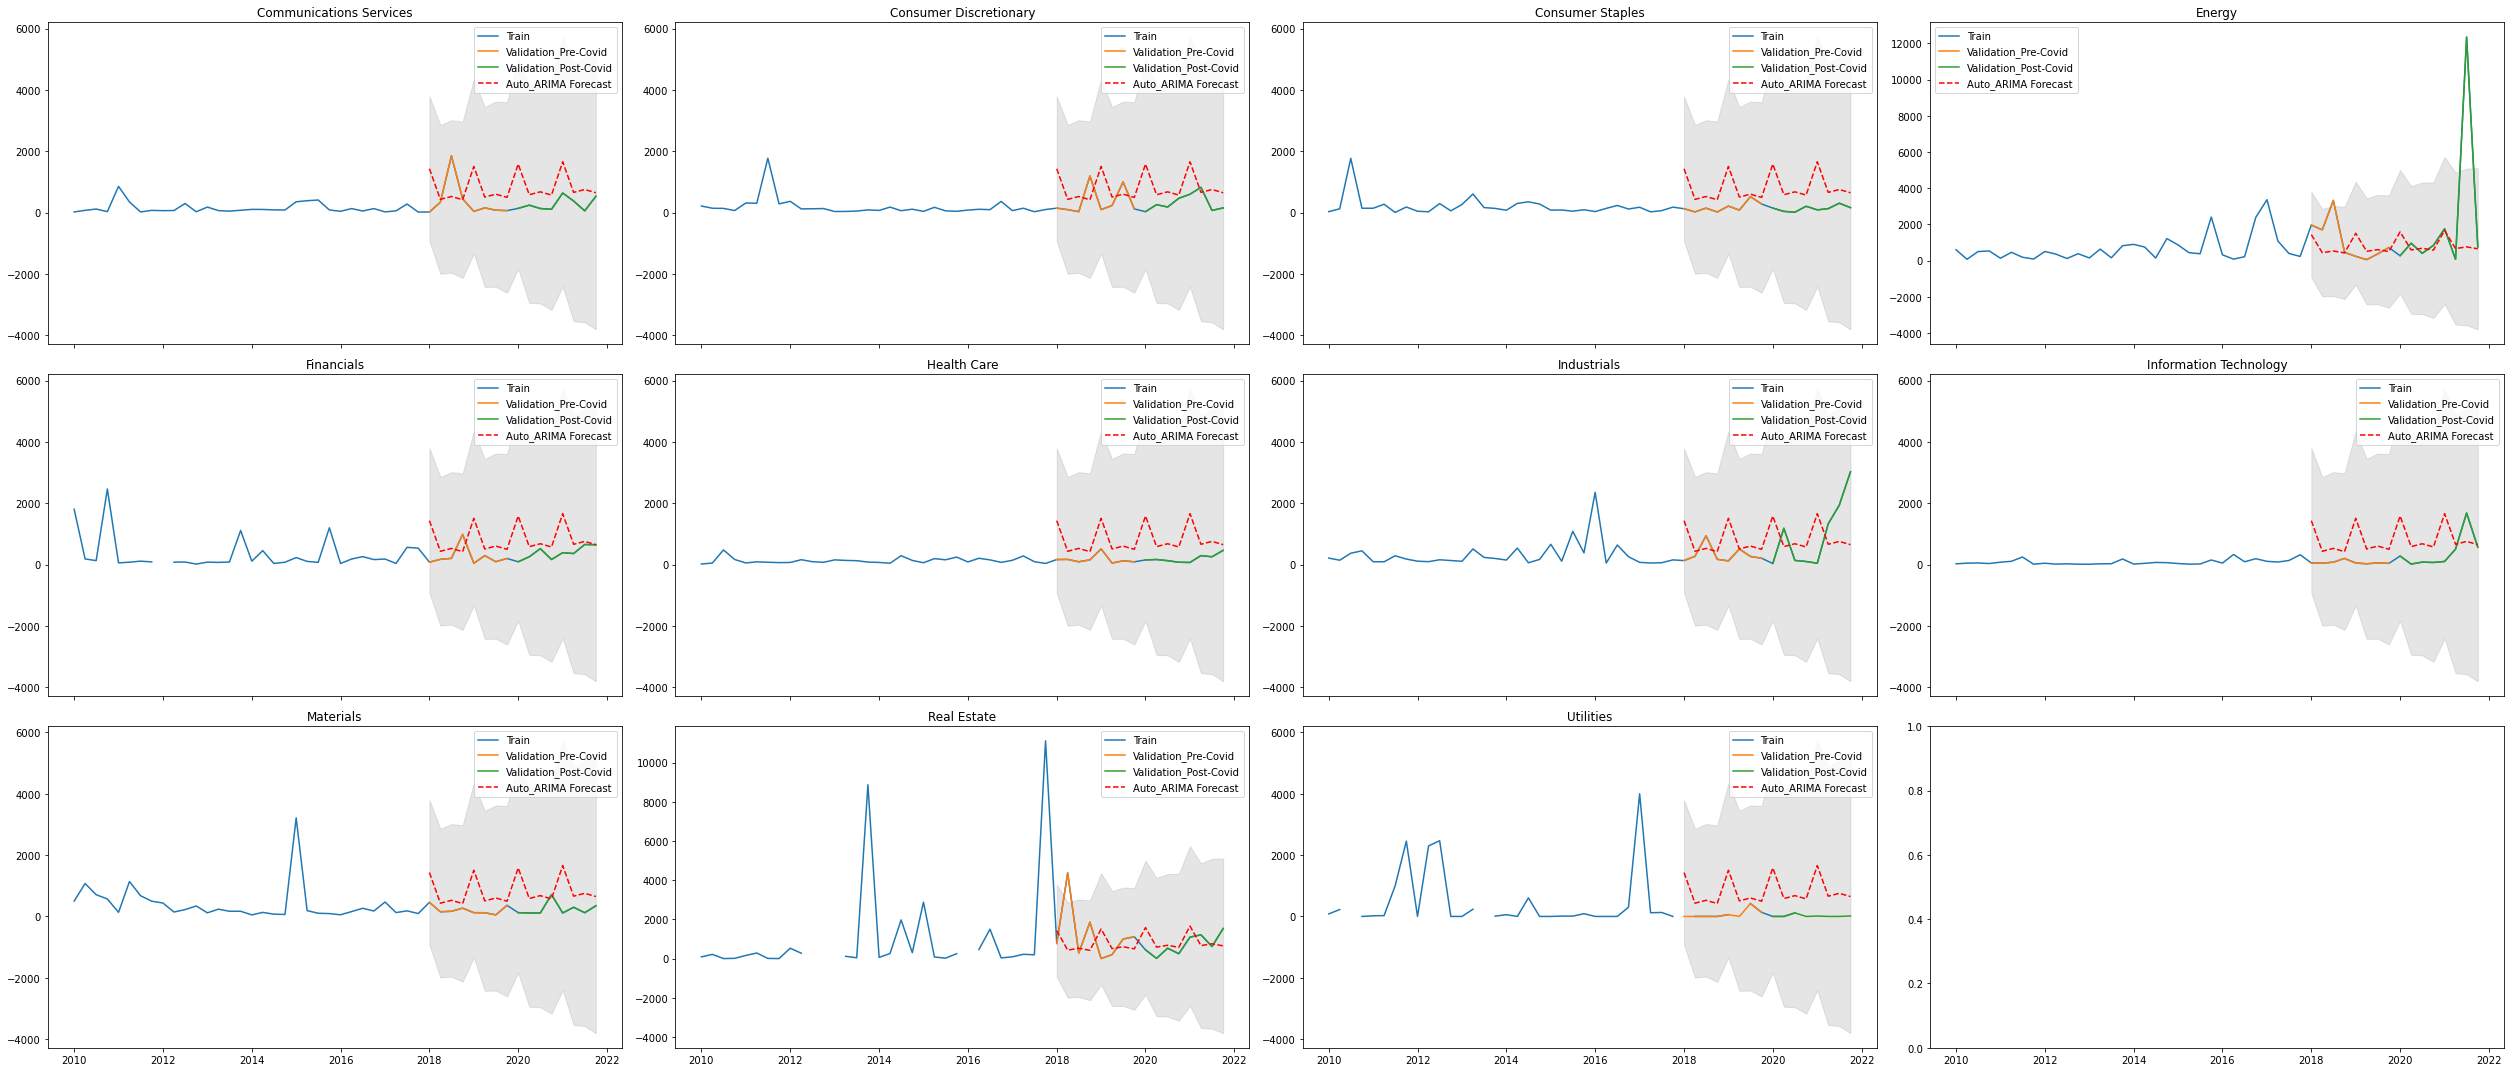

In [28]:
# this plot have both pointwise prediction and CI. using ARIMA manual
industry_list = History_value.columns
row_count = len(History_value[industry])
fig, axes = plt.subplots(ncols=min(len(industry_list), 4), nrows=len(industry_list)//4+1, sharex=True, figsize=(35,15))
i = 0

for industry in industry_list:
    pred_mean, conf_int=auto_arima_model.predict(row_count-len(y_to_train[industry]),dynamic=True,return_conf_int=True,alpha=0.05)
    pred_ci = pd.DataFrame(conf_int,index=predict_date_range[industry].index)
    pred_mean=pd.DataFrame(pred_mean,index=predict_date_range[industry].index)

    axes[i//4,i%4].plot(History_value[industry], label='Train')
    axes[i//4,i%4].plot(y_to_test_precovid[industry], label='Validation_Pre-Covid')
    axes[i//4,i%4].plot(y_to_test_covid[industry], label='Validation_Post-Covid')
    axes[i//4,i%4].plot(pred_mean, label='Auto_ARIMA Forecast',color='red',linestyle='--')
    axes[i//4,i%4].fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1],
                    facecolor="grey", # The fill color
                    color='grey',       # The outline color
                    alpha=0.2)          # Transparency of the fill
    axes[i//4,i%4].set_title(f'{industry}')
    axes[i//4,i%4].legend(loc='best')
    i += 1

plt.tight_layout()
plt.show()

In [29]:
# Root MSE
industry_list = History_value.columns
rmse_auto_ARIMA_df = pd.DataFrame(index=['RMSE_auto_ARIMA']) #stores Root MSE for industries

for industry in industry_list:
    pred_mean=auto_arima_model.predict(row_count-len(y_to_train[industry]),dynamic=True,alpha=0.05)
    rmse_auto_ARIMA = round(sqrt(mean_squared_error(predict_date_range[industry], pred_mean)),2)
    rmse_auto_ARIMA_df[industry] = rmse_auto_ARIMA

rmse_auto_ARIMA_df

Communications Services  Consumer Discretionary  \
RMSE_auto_ARIMA                   822.25                  774.37   

                 Consumer Staples   Energy  Financials  Health Care  \
RMSE_auto_ARIMA            797.16  3047.25      754.92       761.38   

                 Industrials  Information Technology  Materials  Real Estate  \
RMSE_auto_ARIMA      1044.66                  833.82     760.82      1228.35   

                 Utilities  
RMSE_auto_ARIMA     894.84

# Method 5 -Holt winters Exponential smoothing


In [30]:
industry = 'Communications Services'
Holt_winters_model = ExponentialSmoothing(np.asarray(y_to_train[industry]) ,seasonal_periods=4 ,trend='multiplicative', seasonal='multiplicative',).fit()
Hotlt_winters = Holt_winters_model.forecast(len(predict_date_range[industry]))
Hotlt_winters=pd.DataFrame(Hotlt_winters,index=predict_date_range[industry].index)

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [31]:
# this method is hard to directly call the CI function. therefore need to leverage ETS simulation
industry = 'Communications Services'

# Build model.
ets_model = ETSModel(y_to_train[industry],error='add', trend='add', damped_trend=True,initialization_method='heuristic')
ets_result = ets_model.fit()
print(ets_result.summary())
pred=ets_result.get_prediction(start='2018-01-01', end='2021-10-01')
prediction_table=pred.summary_frame(alpha=0.05)

###### point forecast and CI forecast
n_steps_prediction = 16
n_repetitions = 500

df_simul = ets_result.simulate(
    nsimulations=n_steps_prediction,
    repetitions=n_repetitions,
    anchor='end',
)

# Calculate confidence intervals.
upper_ci = df_simul.quantile(q=0.9, axis='columns')
lower_ci = df_simul.quantile(q=0.1, axis='columns')
prediction_table=pd.concat([Hotlt_winters.squeeze(),lower_ci,upper_ci],axis=1)
prediction_table

                                    ETS Results                                    
Dep. Variable:     Communications Services   No. Observations:                   32
Model:                           ETS(AAdN)   Log Likelihood                -209.766
Date:                     Thu, 12 May 2022   AIC                            427.532
Time:                             15:38:23   BIC                            433.395
Sample:                         01-01-2010   HQIC                           429.476
                              - 10-01-2017   Scale                        28926.473
Covariance Type:                    approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.0001        nan        nan        nan         nan         nan
smoothing_trend      1e-08      0.047   2.12e-07      1.000      -0.092     

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


0.0         0.1         0.9
2018-01-01    119.160437  -89.401199  344.565941
2018-04-01    160.953261  -99.544940  324.476351
2018-07-01    398.727901 -116.415731  331.554309
2018-10-01    259.101898 -107.582422  310.411685
2019-01-01    624.784154 -121.727939  327.757826
2019-04-01    843.913044 -106.847656  348.546369
2019-07-01   2090.617332  -95.979528  317.881328
2019-10-01   1358.527755 -139.927645  331.145832
2020-01-01   3275.879565 -141.315400  356.689220
2020-04-01   4424.820119 -117.520976  322.195280
2020-07-01  10961.562570 -111.429816  314.799665
2020-10-01   7123.057271  -71.903344  335.595684
2021-01-01  17176.150922 -131.369190  307.383394
2021-04-01  23200.296798 -116.138932  314.321106
2021-07-01  57473.862920 -129.451883  322.969114
2021-10-01  37347.742583 -101.841370  332.253151

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key,

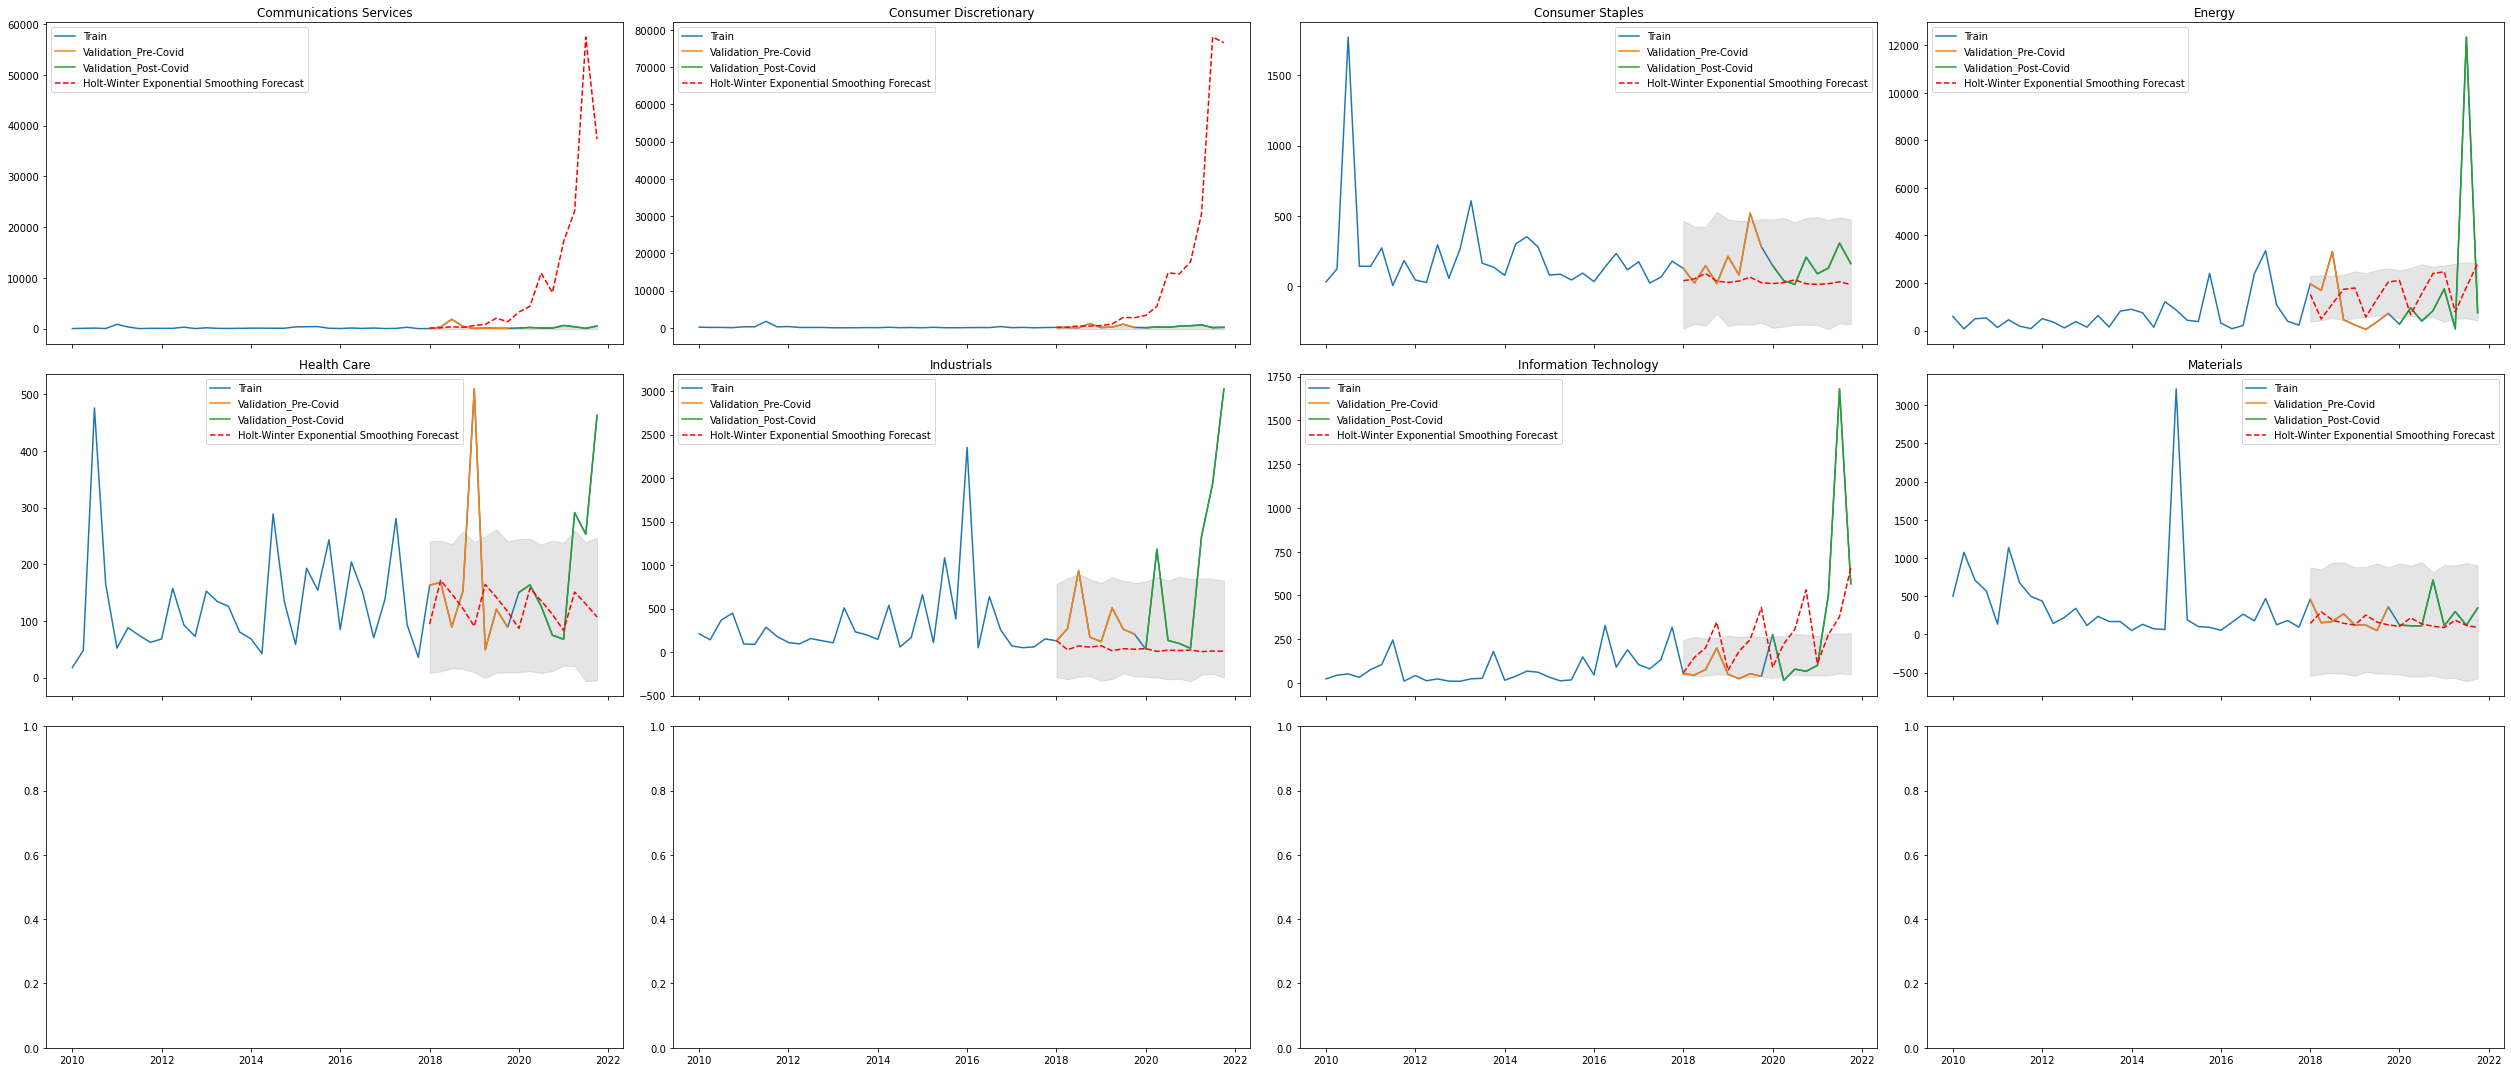

In [32]:
industry_list = History_value.columns
row_count = len(History_value[industry])
fig, axes = plt.subplots(ncols=min(len(industry_list), 4), nrows=len(industry_list)//4+1, sharex=True, figsize=(35,15))
i = 0


# industry's not shown due to 'zero value' error: [Financials, Real Estate, Utilities]
for industry in industry_list.drop(['Financials','Real Estate','Utilities']):
    Holt_winters_model = ExponentialSmoothing(np.asarray(y_to_train[industry]) ,seasonal_periods=4 ,trend='multiplicative', seasonal='multiplicative',).fit()
    Hotlt_winters = Holt_winters_model.forecast(len(predict_date_range[industry]))
    Hotlt_winters=pd.DataFrame(Hotlt_winters,index=predict_date_range[industry].index)

    # Build model.
    ets_model = ETSModel(y_to_train[industry],error='add', trend='add', damped_trend=True,initialization_method='heuristic')
    ets_result = ets_model.fit()
    pred=ets_result.get_prediction(start='2018-01-01', end='2021-10-01')
    prediction_table=pred.summary_frame(alpha=0.05)

    ###### point forecast and CI forecast
    n_steps_prediction = 16
    n_repetitions = 500

    df_simul = ets_result.simulate(
        nsimulations=n_steps_prediction,
        repetitions=n_repetitions,
        anchor='end',
    )

    # Calculate confidence intervals.
    upper_ci = df_simul.quantile(q=0.9, axis='columns')
    lower_ci = df_simul.quantile(q=0.1, axis='columns')
    prediction_table=pd.concat([Hotlt_winters.squeeze(),lower_ci,upper_ci],axis=1)

    axes[i//4,i%4].plot(History_value[industry], label='Train')
    axes[i//4,i%4].plot(y_to_test_precovid[industry], label='Validation_Pre-Covid')
    axes[i//4,i%4].plot(y_to_test_covid[industry], label='Validation_Post-Covid')
    axes[i//4,i%4].plot(prediction_table.iloc[:,0], label='Holt-Winter Exponential Smoothing Forecast',color='red',linestyle='--')
    axes[i//4,i%4].fill_between(prediction_table.index,prediction_table.iloc[:,1],prediction_table.iloc[:,2],
                    facecolor="grey", # The fill color
                    color='grey',       # The outline color
                    alpha=0.2)          # Transparency of the fill
    axes[i//4,i%4].set_title(f'{industry}')
    axes[i//4,i%4].legend(loc='best')
    i += 1

plt.tight_layout()
plt.show()

In [33]:
# Root MSE
industry_list = History_value.columns
rmse_Holt_winters_df = pd.DataFrame(index=['RMSE_auto_ARIMA']) #stores Root MSE for industries

for industry in industry_list:
    rmse_Holt_winters = round(sqrt(mean_squared_error(predict_date_range[industry], Hotlt_winters)),2)
    rmse_Holt_winters_df[industry] = rmse_Holt_winters

rmse_Holt_winters_df

Communications Services  Consumer Discretionary  \
RMSE_auto_ARIMA                   464.31                  410.02   

                 Consumer Staples  Energy  Financials  Health Care  \
RMSE_auto_ARIMA             155.1  3256.9      316.16       156.91   

                 Industrials  Information Technology  Materials  Real Estate  \
RMSE_auto_ARIMA       961.92                  433.24     205.97      1282.76   

                 Utilities  
RMSE_auto_ARIMA     164.05

# Method 6- ETS MODELS

In [34]:
# Build model example
industry = 'Communications Services'

ets_model = ETSModel(y_to_train[industry],error='add', trend='add', damped_trend=True,initialization_method='heuristic')
ets_result = ets_model.fit()
print(ets_result.summary())
pred=ets_result.get_prediction(start='2018-01-01', end='2021-10-01')
prediction_table=pred.summary_frame(alpha=0.05)


                                    ETS Results                                    
Dep. Variable:     Communications Services   No. Observations:                   32
Model:                           ETS(AAdN)   Log Likelihood                -209.766
Date:                     Thu, 12 May 2022   AIC                            427.532
Time:                             15:38:28   BIC                            433.395
Sample:                         01-01-2010   HQIC                           429.476
                              - 10-01-2017   Scale                        28926.473
Covariance Type:                    approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.0001        nan        nan        nan         nan         nan
smoothing_trend      1e-08      0.047   2.12e-07      1.000      -0.092     

C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\alannguyen\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\alannguyen\Anaconda3\lib\site-p

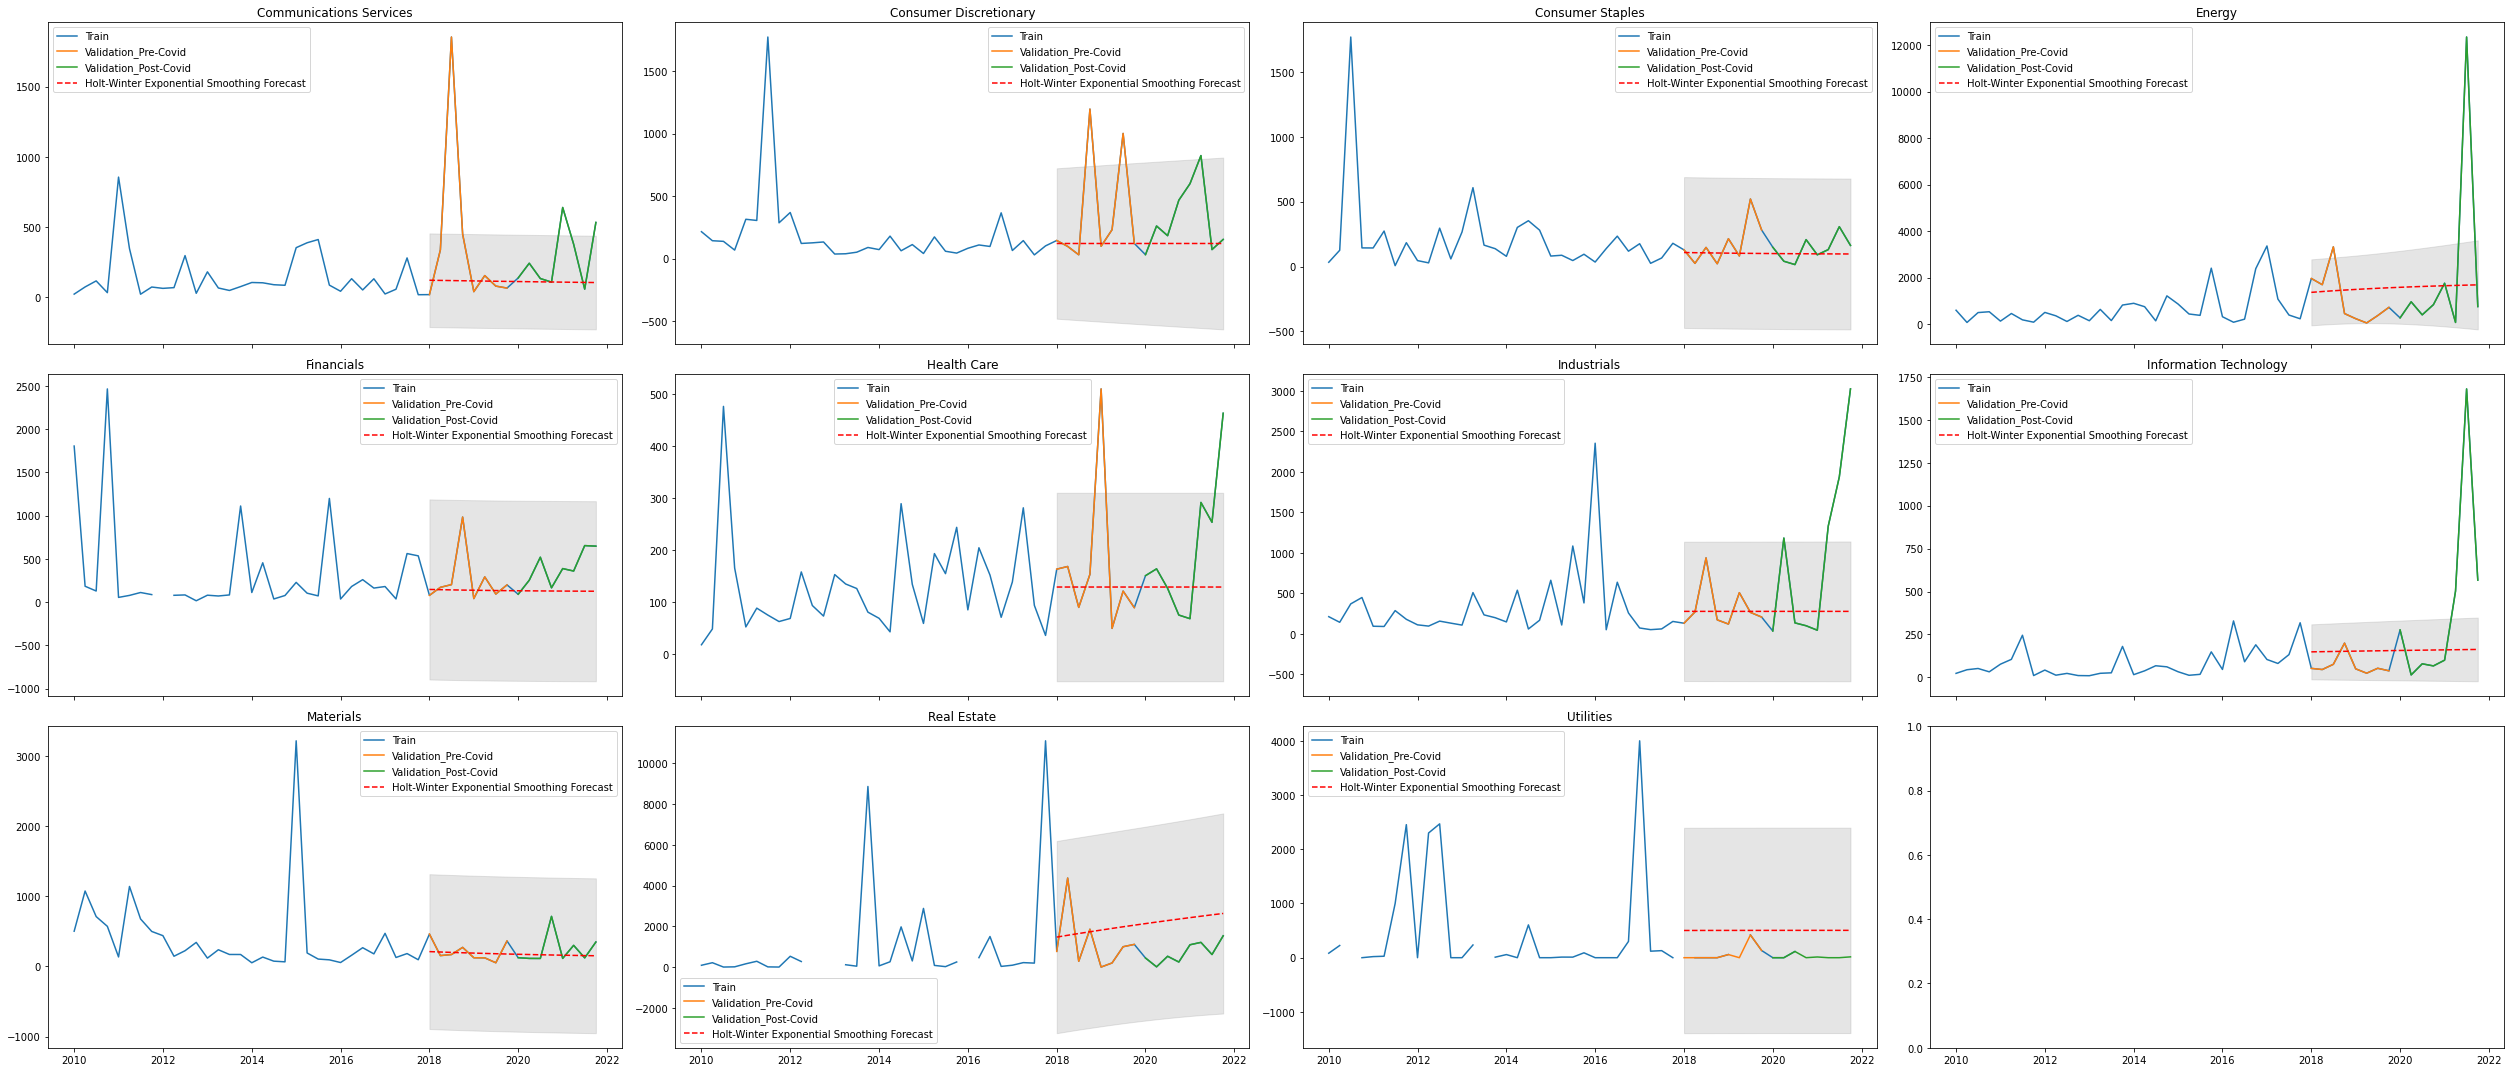

In [35]:

industry_list = History_value.columns
row_count = len(History_value[industry])
fig, axes = plt.subplots(ncols=min(len(industry_list), 4), nrows=len(industry_list)//4+1, sharex=True, figsize=(35,15))
i = 0

for industry in industry_list:

    ets_model = ETSModel(y_to_train[industry],error='add', trend='add', damped_trend=True,initialization_method='heuristic')
    ets_result = ets_model.fit()
    pred=ets_result.get_prediction(start='2018-01-01', end='2021-10-01')
    prediction_table=pred.summary_frame(alpha=0.05)

    axes[i//4,i%4].plot(History_value[industry], label='Train')
    axes[i//4,i%4].plot(y_to_test_precovid[industry], label='Validation_Pre-Covid')
    axes[i//4,i%4].plot(y_to_test_covid[industry], label='Validation_Post-Covid')
    axes[i//4,i%4].plot(prediction_table.iloc[:,0], label='Holt-Winter Exponential Smoothing Forecast',color='red',linestyle='--')
    axes[i//4,i%4].fill_between(prediction_table.index,prediction_table.iloc[:,1],prediction_table.iloc[:,2],
                    facecolor="grey", # The fill color
                    color='grey',       # The outline color
                    alpha=0.2)          # Transparency of the fill
    axes[i//4,i%4].set_title(f'{industry}')
    axes[i//4,i%4].legend(loc='best')
    i += 1

plt.tight_layout()
plt.show()